In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
from sqlite3 import connect

In [2]:
from IPython.display import display, HTML
import warnings

In [3]:
display(HTML("<style>.container { width:100% !important; }</style>"))
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:.2f}".format

In [4]:
INPUT = 'przetwarzanie_faktur_zadanie.csv'

In [5]:
CONFIG = 'config.json'

In [6]:
# Get the absolute path of the file within the INPUTS directory
FILE_PATH = os.path.join(os.getcwd(), 'INPUTS', INPUT)

# Print the file path
print(FILE_PATH)

C:\Users\KonuTech\PycharmProjects\yet-another-analysis\INPUTS\przetwarzanie_faktur_zadanie.csv


In [7]:
# Get the absolute path of the config within the CONFIGS directory
CONFIG_PATH = os.path.join(os.getcwd(), 'CONFIGS', CONFIG)

# Print the fileconfig_pathpath
print(CONFIG_PATH)

C:\Users\KonuTech\PycharmProjects\yet-another-analysis\CONFIGS\config.json


In [8]:
with open(CONFIG_PATH, encoding='utf-8') as f:
    CONFIG = json.load(f)

In [9]:
# INDEX_COL = CONFIG["INPUTS"]["INDEX_COLUMNS"]
SEP = CONFIG["INPUTS"]["SEPARATOR"]
# DECIMAL = CONFIG["INPUTS"]["DECIMAL"]
ENCODING = CONFIG["INPUTS"]["ENCODING"]
DATE_COLUMNS = CONFIG["INPUTS"]["DATE_COLUMNS"]
# FLOAT_PRECISION = CONFIG["INPUTS"]["FLOAT_PRECISION"]
DTYPE = CONFIG["INPUTS"]["DTYPE"]
COLUMNS_WITH_NAN_VALUES = CONFIG["INPUTS"]["COLUMNS_WITH_NAN_VALUES"]
# # X_ORDER = CONFIG["X_ORDER"]
HUE_ORDER = CONFIG["HUE_ORDER"]
COL_ORDER = CONFIG["COL_ORDER"]
WEEKDAY_ORDER = CONFIG["WEEKDAY_ORDER"]

In [10]:
# INDEX_COL

In [11]:
SEP

';'

In [12]:
ENCODING

'utf-8'

In [13]:
DATE_COLUMNS

['StartDateTimeUtc']

In [14]:
DTYPE

{'ID_Process': 'object',
 'ID_Document': 'object',
 'Queue': 'object',
 'ProcessingDuration': 'int64',
 'Duration': 'int64',
 'InputPageCount': 'int64',
 'MessagesInQueue': 'int64',
 'Retries': 'int64'}

In [15]:
COLUMNS_WITH_NAN_VALUES

['Duration']

In [16]:
HUE_ORDER

['potok_1-1', 'potok_1-2', 'potok_2-1', 'potok_2-2', 'potok_3-1', 'potok_3-2']

In [17]:
COL_ORDER

['potok_1', 'potok_2', 'potok_3']

In [18]:
WEEKDAY_ORDER

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [19]:
df = pd.read_csv(
    filepath_or_buffer=FILE_PATH,
#     index_col=INDEX_COL,
    sep=SEP,
    encoding=ENCODING,
    engine="c",
    low_memory=False,
    parse_dates=DATE_COLUMNS,
#     dtype=DTYPE
)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121190 entries, 0 to 1121189
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   ID_Process          1121190 non-null  int64         
 1   Queue               1107824 non-null  object        
 2   ID_Document         1107824 non-null  float64       
 3   ProcessingDuration  1085406 non-null  float64       
 4   Duration            1080011 non-null  float64       
 5   InputPageCount      1085406 non-null  float64       
 6   MessagesInQueue     1121190 non-null  int64         
 7   Retries             1121190 non-null  int64         
 8   StartDateTimeUtc    1121190 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 77.0+ MB


In [21]:
df.head()

ID_Process      Queue  ID_Document  ProcessingDuration  Duration  \
0     2299375  potok_1-1   2270386.00             2583.00   2940.00   
1      202658  potok_1-1    245850.00             5486.00   6626.00   
2     2323656  potok_3-1   2304772.00             2079.00   2606.00   
3      115622  potok_1-2    165259.00             2915.00   3228.00   
4      343261  potok_1-1    237985.00             2480.00   3114.00   

   InputPageCount  MessagesInQueue  Retries        StartDateTimeUtc  
0            1.00                4        0 2023-03-02 12:47:31.880  
1            2.00                6        0 2023-02-10 08:33:17.910  
2            1.00                7        0 2023-03-03 13:35:13.690  
3            2.00                1        0 2023-02-15 14:18:19.550  
4            1.00                9        0 2023-02-15 07:26:05.317

In [22]:
df.tail()

ID_Process      Queue  ID_Document  ProcessingDuration  Duration  \
1121185     2627984  potok_3-2   2571026.00             3040.00   3683.00   
1121186     2492632  potok_3-1   2457336.00             3127.00   3425.00   
1121187     2771801  potok_3-2   2812898.00              298.00    715.00   
1121188     2343195  potok_1-2   2328046.00             9247.00   9689.00   
1121189      272829  potok_1-2     11148.00               74.00  10153.00   

         InputPageCount  MessagesInQueue  Retries        StartDateTimeUtc  
1121185            1.00                2        0 2023-03-13 19:29:07.610  
1121186            1.00                6        0 2023-03-09 12:50:04.387  
1121187            2.00                0        0 2023-03-24 07:14:42.087  
1121188            1.00                4        0 2023-03-05 21:14:38.007  
1121189            3.00                0        0 2023-02-13 10:47:07.257

In [23]:
df.describe()

ID_Process  ID_Document  ProcessingDuration    Duration  \
count  1121190.00   1107824.00          1085406.00  1080011.00   
mean   1623558.71   1616588.28             4187.53    25350.38   
std    1131326.47   1122477.06             5195.52   323548.18   
min          1.00         3.00               34.00      271.00   
25%     280298.25    276786.75             2264.00     2714.00   
50%    2311131.50   2295873.50             2973.00     3707.00   
75%    2591428.75   2572823.25             4841.00     7064.00   
max    2883900.00   2861842.00          1422420.00 45199914.00   

       InputPageCount  MessagesInQueue    Retries  
count      1085406.00       1121190.00 1121190.00  
mean             1.21             9.01       0.00  
std              2.13            52.46       0.09  
min              1.00             0.00       0.00  
25%              1.00             1.00       0.00  
50%              1.00             3.00       0.00  
75%              1.00             7.00       0.00  
max            736.00          2018.00       9.00

In [24]:
df.isnull().sum()

ID_Process                0
Queue                 13366
ID_Document           13366
ProcessingDuration    35784
Duration              41179
InputPageCount        35784
MessagesInQueue           0
Retries                   0
StartDateTimeUtc          0
dtype: int64

## preprocessing

## ON/OFF -- Filling NaN

In [25]:
# df['ProcessingDuration'].fillna(1e-1000, inplace=True)
# df['Duration'].fillna(1e-1000, inplace=True)
# df['InputPageCount'].fillna(0, inplace=True)

In [26]:
# Convert the time values to minutes, hours, and days
df['ProcessingDuration_sec'] = df['ProcessingDuration'] / 1000
# df['ProcessingDuration_min'] = df['ProcessingDuration'] / (1000 * 60)
# df['ProcessingDuration_hours'] = df['ProcessingDuration'] / (1000 * 60 * 60)
# df['ProcessingDuration_days'] = df['ProcessingDuration'] / (1000 * 60 * 60 * 24)

In [27]:
# Convert the time values to minutes, hours, and days
df['Duration_sec'] = df['Duration'] / 1000
# df['Duration_min'] = df['Duration'] / (1000 * 60)
# df['Duration_hours'] = df['Duration'] / (1000 * 60 * 60)
# df['Duration_days'] = df['Duration'] / (1000 * 60 * 60 * 24)

In [28]:
# Create a FunctionTransformer object with a logarithmic transformation function
# log_transformer = FunctionTransformer(np.log1p)
log_transformer = FunctionTransformer(np.log10)

# Apply the logarithmic transformation to the "Sales" column
df['Log_ProcessingDuration'] = log_transformer.transform(df[['ProcessingDuration']] + 1)
df['Log_ProcessingDuration_sec'] = log_transformer.transform(df[['ProcessingDuration_sec']] + 1)
# df['Log_ProcessingDuration_min'] = log_transformer.transform(df[['ProcessingDuration_min']] + 1)
# df['Log_ProcessingDuration_hours'] = log_transformer.transform(df[['ProcessingDuration_hours']] + 1)
# df['Log_ProcessingDuration_days'] = log_transformer.transform(df[['ProcessingDuration_days']] + 1)

df['Log_Duration'] = log_transformer.transform(df[['Duration']] + 1)
df['Log_Duration_sec'] = log_transformer.transform(df[['Duration_sec']] + 1)
# df['Log_Duration_min'] = log_transformer.transform(df[['Duration_min']] + 1)
# df['Log_Duration_hours'] = log_transformer.transform(df[['Duration_hours']] + 1)
# df['Log_Duration_days'] = log_transformer.transform(df[['Duration_days']] + 1)

In [29]:
# df['Queue'] = df['Queue'].fillna('Potok_0-0')

In [30]:
df[['potok']] = 'potok_' + df['Queue'].str.extract(r'^potok_(\d+)')

In [31]:
# for i, v in enumerate(sorted(df["Queue"].unique())):
#     print("POTOK:", i, v)
#     print(df[df["Queue"] == v].isnull().sum(), "\n")

In [32]:
# Convert to datetime
df['date_time'] = pd.to_datetime(df['StartDateTimeUtc'])

# Extract date-related columns
df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df['week'] = df['date_time'].dt.week
df['day'] = df['date_time'].dt.day
df['hour'] = df['date_time'].dt.hour
df['minute'] = df['date_time'].dt.minute
df['second'] = df['date_time'].dt.second
df['microsecond'] = df['date_time'].dt.microsecond
# df['weekday'] = df['date_time'].dt.weekday
# Create a new column indicating the weekday (Monday is 1st, Sunday is 7th)
df['weekday'] = df['date_time'].dt.weekday.apply(lambda x: x + 1 if x != 6 else 7)
df['weekday_name'] = df['date_time'].dt.strftime('%A')
df['month_name'] = df['date_time'].dt.strftime('%B')

# Create flag for typical working hours (9 AM to 5 PM on weekdays)
df['working_hours'] = np.where((df['weekday'].isin([1,2,3,4,5])) & (df['hour'] >= 9) & (df['hour'] < 17), 1, 0)

In [33]:
df[df['weekday'].isin([6,7])].head()

ID_Process      Queue  ID_Document  ProcessingDuration  Duration  \
19     2347610  potok_1-2   2323521.00             5174.00   5681.00   
46      303874  potok_1-1     13020.00             2331.00   2845.00   
48      785128  potok_3-2    693766.00             6149.00   7274.00   
62      129788  potok_1-2      6491.00            10984.00  44663.00   
85     2791819  potok_3-1   2683288.00             4195.00   4518.00   

    InputPageCount  MessagesInQueue  Retries        StartDateTimeUtc  \
19            1.00                1        0 2023-03-05 11:53:10.883   
46            1.00                4        0 2023-02-19 15:10:10.867   
48            1.00               10        0 2023-02-05 19:47:58.283   
62            1.00               19        0 2023-02-19 03:27:32.237   
85            1.00                1        0 2023-03-19 20:20:47.470   

    ProcessingDuration_sec  ...  week  day  hour  minute  second microsecond  \
19                    5.17  ...     9    5    11      53      10      883000   
46                    2.33  ...     7   19    15      10      10      867000   
48                    6.15  ...     5    5    19      47      58      283000   
62                   10.98  ...     7   19     3      27      32      237000   
85                    4.20  ...    11   19    20      20      47      470000   

   weekday  weekday_name  month_name  working_hours  
19       7        Sunday       March              0  
46       7        Sunday    February              0  
48       7        Sunday    February              0  
62       7        Sunday    February              0  
85       7        Sunday       March              0  

[5 rows x 29 columns]

## samplowanie

In [34]:
df_sample = df[~df['Queue'].isnull()].sample(frac=0.01, replace=False)
df_sample

ID_Process      Queue  ID_Document  ProcessingDuration  Duration  \
337091     2228822  potok_3-1   2206462.00             3840.00   4358.00   
995140     2372978  potok_1-1   2358321.00              151.00    473.00   
32800      2879987  potok_3-2   2746125.00             2779.00   3255.00   
693952     2610607  potok_3-1   2449328.00              106.00    425.00   
373725     2858737  potok_3-2   2824216.00             4682.00   5655.00   
...            ...        ...          ...                 ...       ...   
573199     2491996  potok_3-2   2546809.00             3764.00  18940.00   
80642       100491  potok_1-1    217682.00             1994.00   2394.00   
512499     2461232  potok_3-1   2599598.00             2878.00   3170.00   
743382      376008  potok_1-2    368311.00             4314.00  15214.00   
984685      726375  potok_1-2    386648.00             2658.00  11261.00   

        InputPageCount  MessagesInQueue  Retries        StartDateTimeUtc  \
337091            1.00                0        0 2023-02-24 08:23:13.867   
995140            2.00                0        0 2023-03-06 08:00:07.450   
32800             1.00                0        0 2023-03-27 13:13:33.840   
693952            1.00                4        0 2023-03-11 20:39:11.450   
373725            1.00                5        0 2023-03-23 12:09:06.900   
...                ...              ...      ...                     ...   
573199            2.00                6        0 2023-03-10 10:29:56.957   
80642             1.00                2        0 2023-02-18 09:13:24.617   
512499            1.00               10        0 2023-03-16 14:27:45.740   
743382            1.00               24        0 2023-02-06 14:44:30.040   
984685            1.00                1        0 2023-02-04 13:11:21.387   

        ProcessingDuration_sec  ...  week  day  hour  minute  second  \
337091                    3.84  ...     8   24     8      23      13   
995140                    0.15  ...    10    6     8       0       7   
32800                     2.78  ...    13   27    13      13      33   
693952                    0.11  ...    10   11    20      39      11   
373725                    4.68  ...    12   23    12       9       6   
...                        ...  ...   ...  ...   ...     ...     ...   
573199                    3.76  ...    10   10    10      29      56   
80642                     1.99  ...     7   18     9      13      24   
512499                    2.88  ...    11   16    14      27      45   
743382                    4.31  ...     6    6    14      44      30   
984685                    2.66  ...     5    4    13      11      21   

       microsecond weekday  weekday_name  month_name  working_hours  
337091      867000       5        Friday    February              0  
995140      450000       1        Monday       March              0  
32800       840000       1        Monday       March              1  
693952      450000       6      Saturday       March              0  
373725      900000       4      Thursday       March              1  
...            ...     ...           ...         ...            ...  
573199      957000       5        Friday       March              1  
80642       617000       6      Saturday    February              0  
512499      740000       4      Thursday       March              1  
743382       40000       1        Monday    February              1  
984685      387000       6      Saturday    February              0  

[11078 rows x 29 columns]

In [35]:
df_sample.describe()

ID_Process  ID_Document  ProcessingDuration    Duration  \
count    11078.00     11078.00            10713.00    10654.00   
mean   1647885.38   1635048.80             4208.86    24977.05   
std    1123843.55   1117232.80             4749.72   320046.55   
min         20.00       277.00               37.00      320.00   
25%     291810.50    285499.50             2275.00     2734.00   
50%    2325124.50   2307208.00             2984.00     3710.00   
75%    2584397.50   2574938.25             4819.00     6938.75   
max    2883597.00   2861458.00           135169.00 10919548.00   

       InputPageCount  MessagesInQueue  Retries  ProcessingDuration_sec  \
count        10713.00         11078.00 11078.00                10713.00   
mean             1.21             9.13     0.01                    4.21   
std              1.20            51.51     0.12                    4.75   
min              1.00             0.00     0.00                    0.04   
25%              1.00             1.00     0.00                    2.27   
50%              1.00             3.00     0.00                    2.98   
75%              1.00             7.00     0.00                    4.82   
max             50.00          1989.00     9.00                  135.17   

       Duration_sec  Log_ProcessingDuration  ...     year    month     week  \
count      10654.00                10713.00  ... 11078.00 11078.00 11078.00   
mean          24.98                    3.43  ...  2023.00     2.55     8.89   
std          320.05                    0.50  ...     0.00     0.50     2.31   
min            0.32                    1.58  ...  2023.00     2.00     5.00   
25%            2.73                    3.36  ...  2023.00     2.00     7.00   
50%            3.71                    3.47  ...  2023.00     3.00     9.00   
75%            6.94                    3.68  ...  2023.00     3.00    11.00   
max        10919.55                    5.13  ...  2023.00     3.00    13.00   

           day     hour   minute   second  microsecond  weekday  working_hours  
count 11078.00 11078.00 11078.00 11078.00     11078.00 11078.00       11078.00  
mean     13.02    11.97    29.72    29.81    500458.57     3.28           0.61  
std       7.39     4.01    17.27    17.19    289456.14     1.74           0.49  
min       1.00     0.00     0.00     0.00         0.00     1.00           0.00  
25%       7.00     9.00    15.00    15.00    247000.00     2.00           0.00  
50%      13.00    11.00    30.00    30.00    500000.00     3.00           1.00  
75%      17.00    14.00    44.00    45.00    753000.00     5.00           1.00  
max      31.00    23.00    59.00    59.00    997000.00     7.00           1.00  

[8 rows x 23 columns]

# CHARTS

## HISTOGRAMS

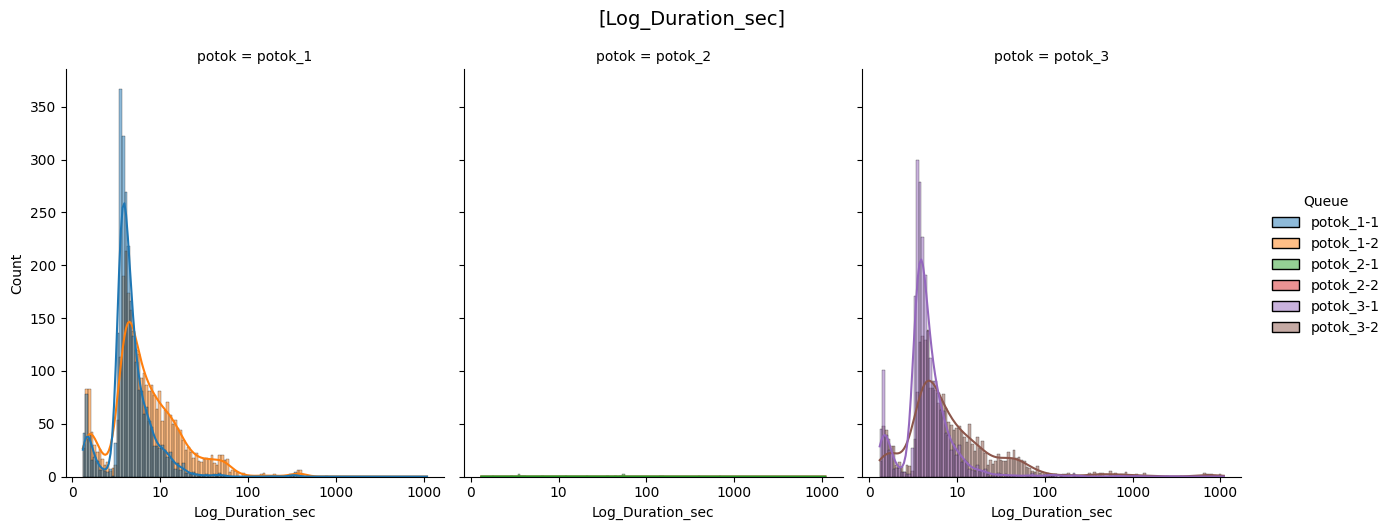

In [36]:
# Create a histogram with groupings based on Order Year
g = sns.displot(
    data=df_sample,
    x="Log_Duration_sec",
    hue="Queue",
    kde=True,
    hue_order=HUE_ORDER,
    col="potok",
    col_order=COL_ORDER,
    aspect=.85
)

# Customize the plot
# g.set(xlim=(0, 6), ylim=(0, 350), xlabel="Log_ProcessingDuration_min", ylabel="Frequency")
g.set(xticks=[0, 1, 2, 3, 4], xticklabels=["0", "10", "100", "1000", "1000"])
g.fig.suptitle(f"[Log_Duration_sec]", fontsize=14, y=1.05)
# Show the plot
plt.show()

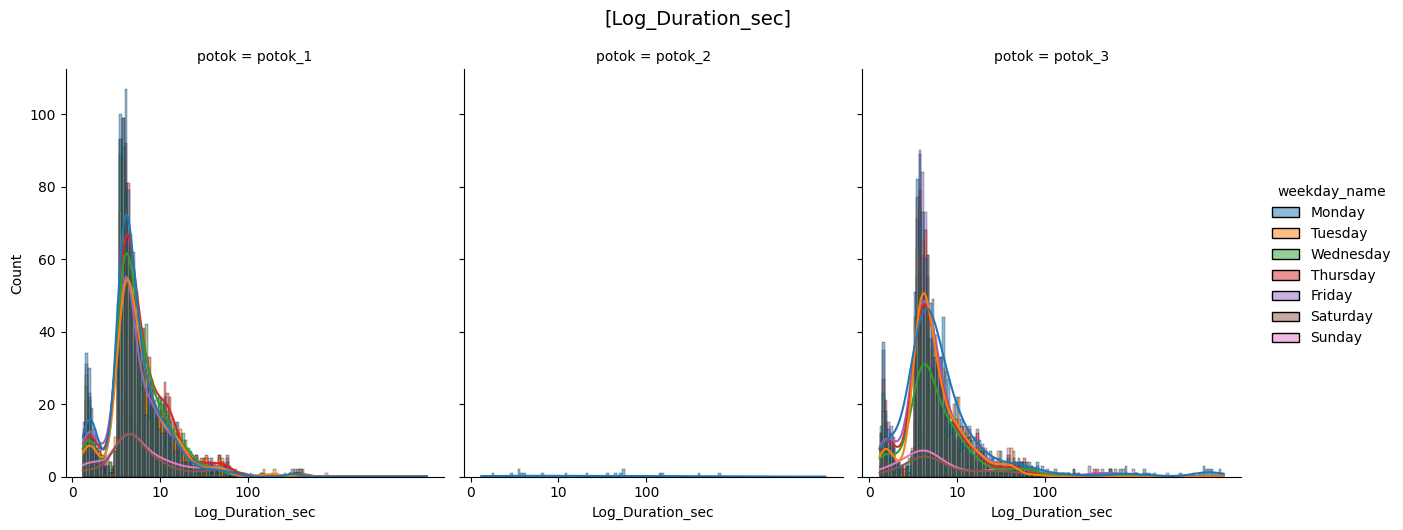

In [37]:
# Create a histogram with groupings based on Order Year
g = sns.displot(
    data=df_sample,
    x="Log_Duration_sec",
    hue="weekday_name",
    kde=True,
    hue_order=WEEKDAY_ORDER,
    col="potok",
    col_order=COL_ORDER,
    aspect=.85    
)

# Customize the plot
# g.set(xlim=(0, 6), ylim=(0, 350), xlabel="Log_ProcessingDuration_min", ylabel="Frequency")
g.set(xticks=[0, 1, 2], xticklabels=["0", "10", "100"])
g.fig.suptitle(f"[Log_Duration_sec]", fontsize=14, y=1.05)
# Show the plot
plt.show()

potok_1-1


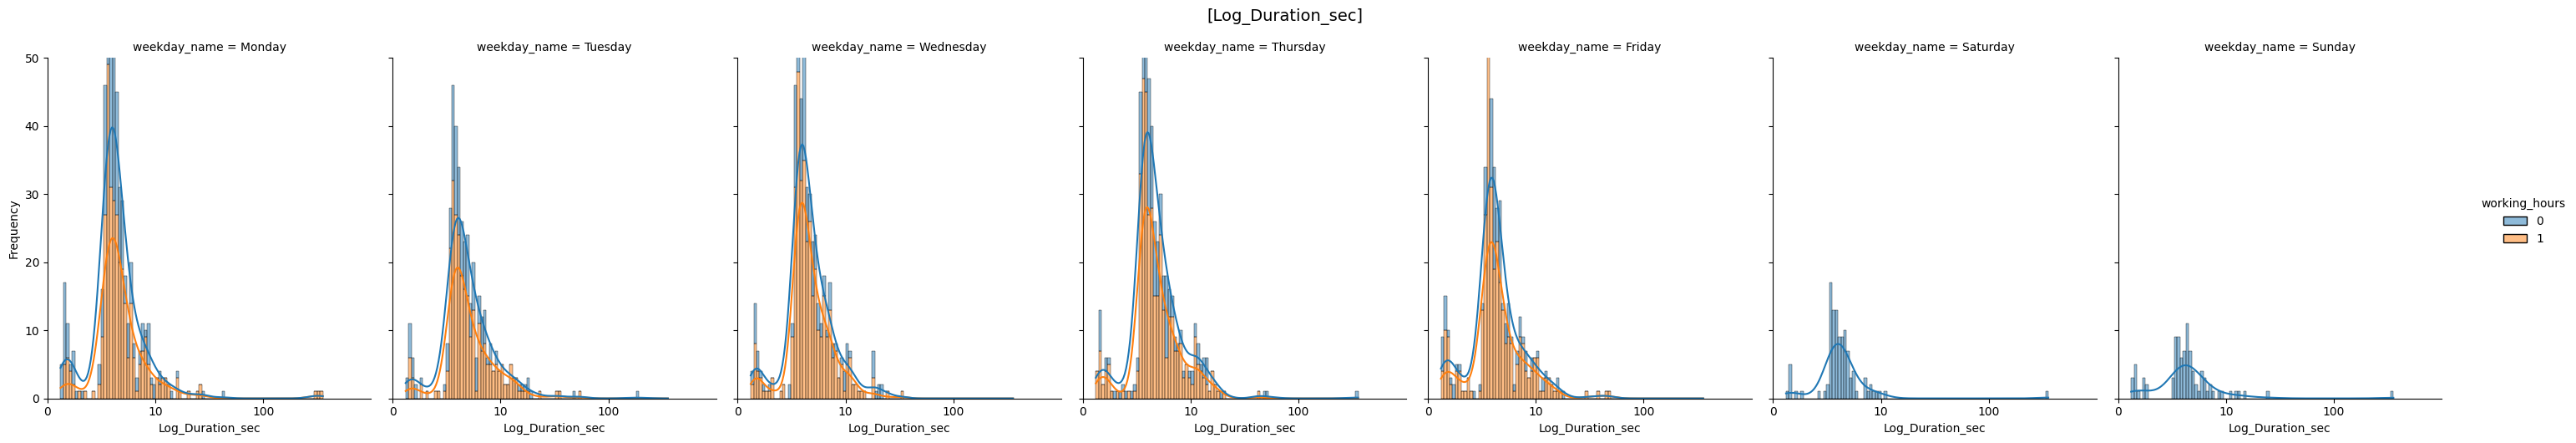

potok_1-2


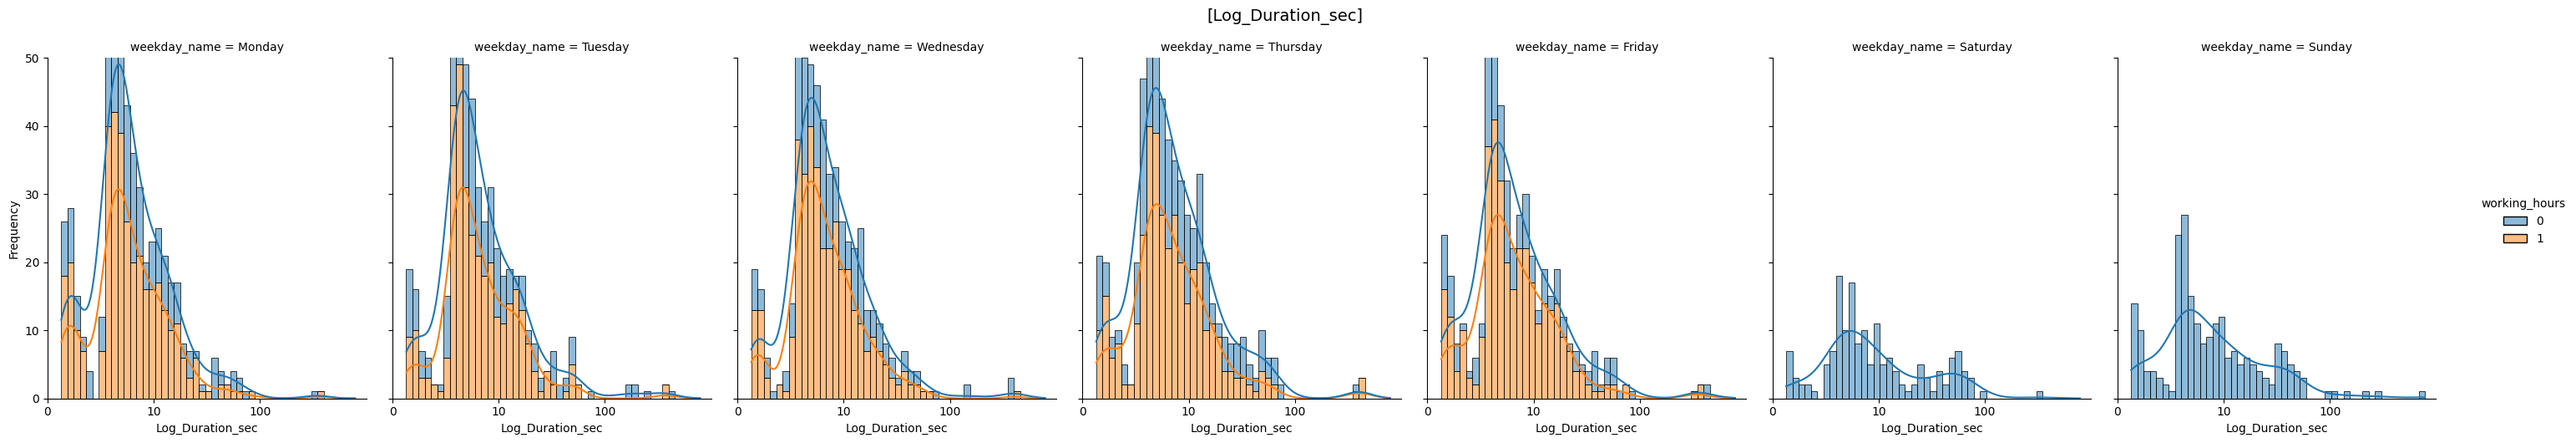

potok_2-1


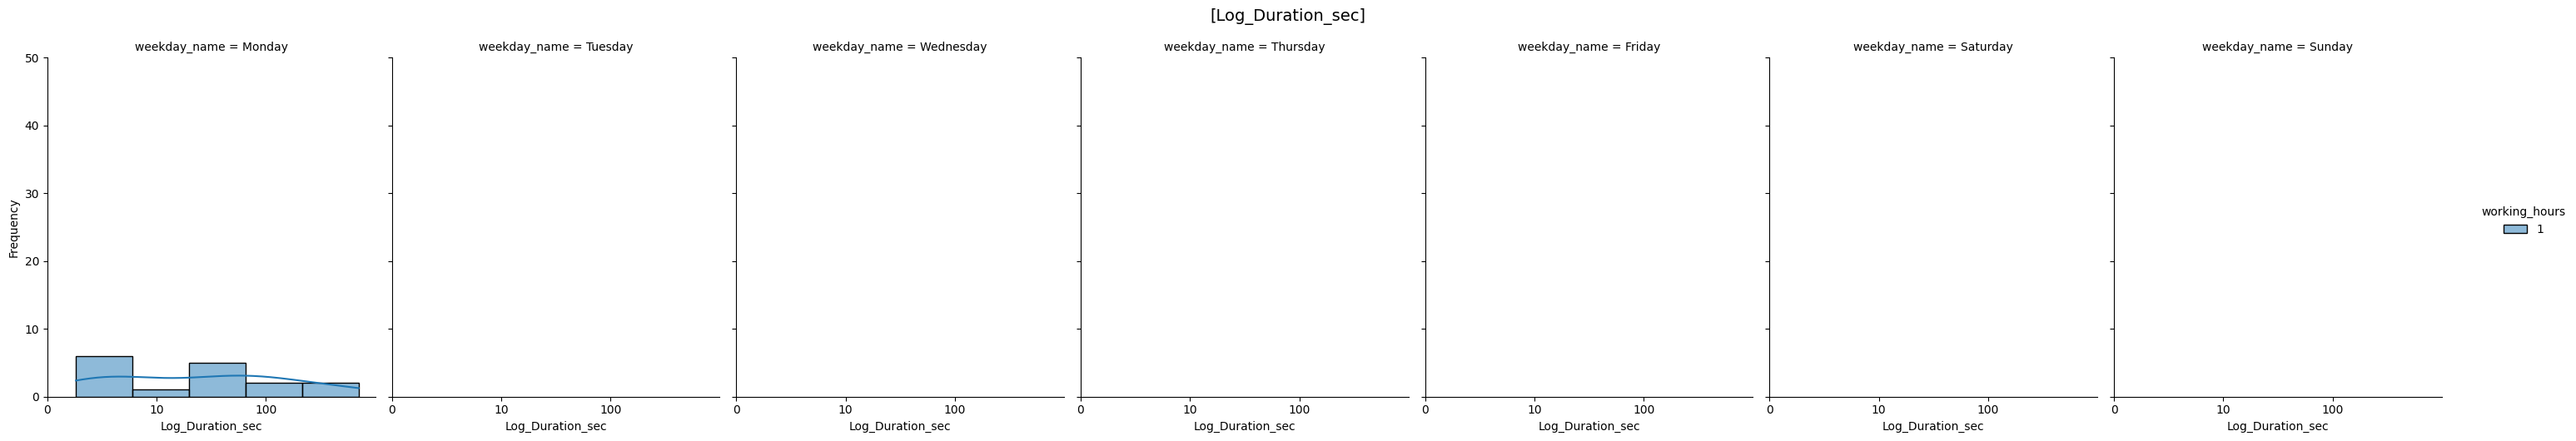

potok_2-2


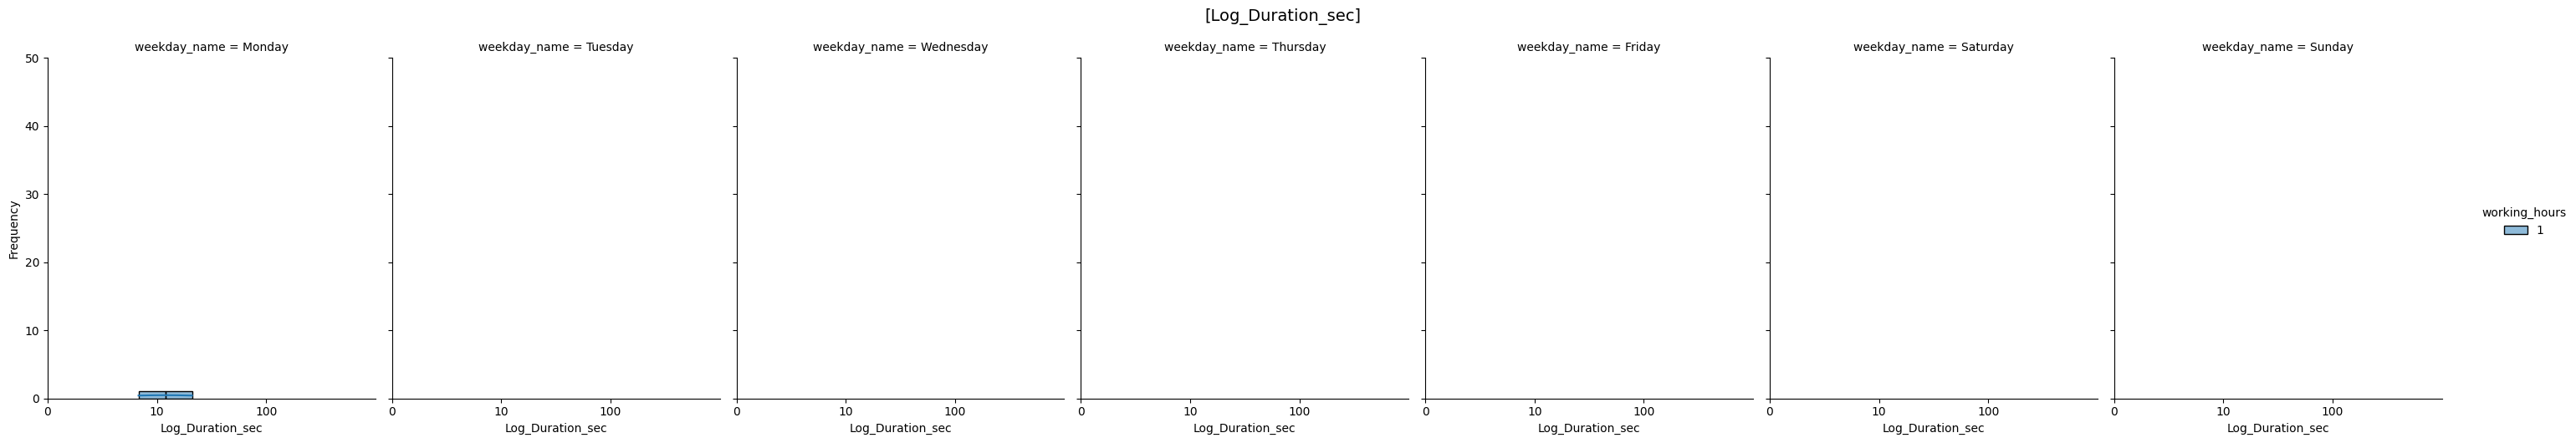

potok_3-1


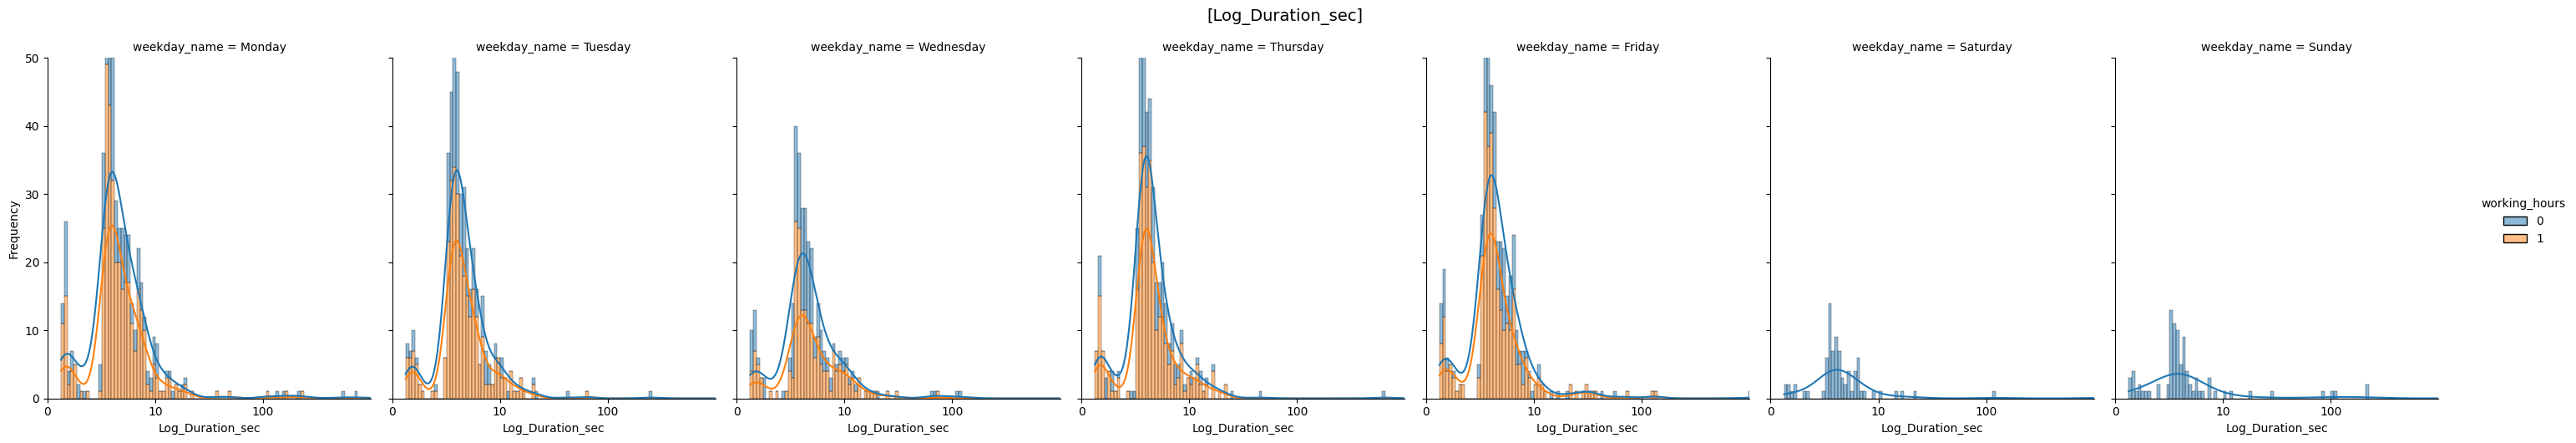

potok_3-2


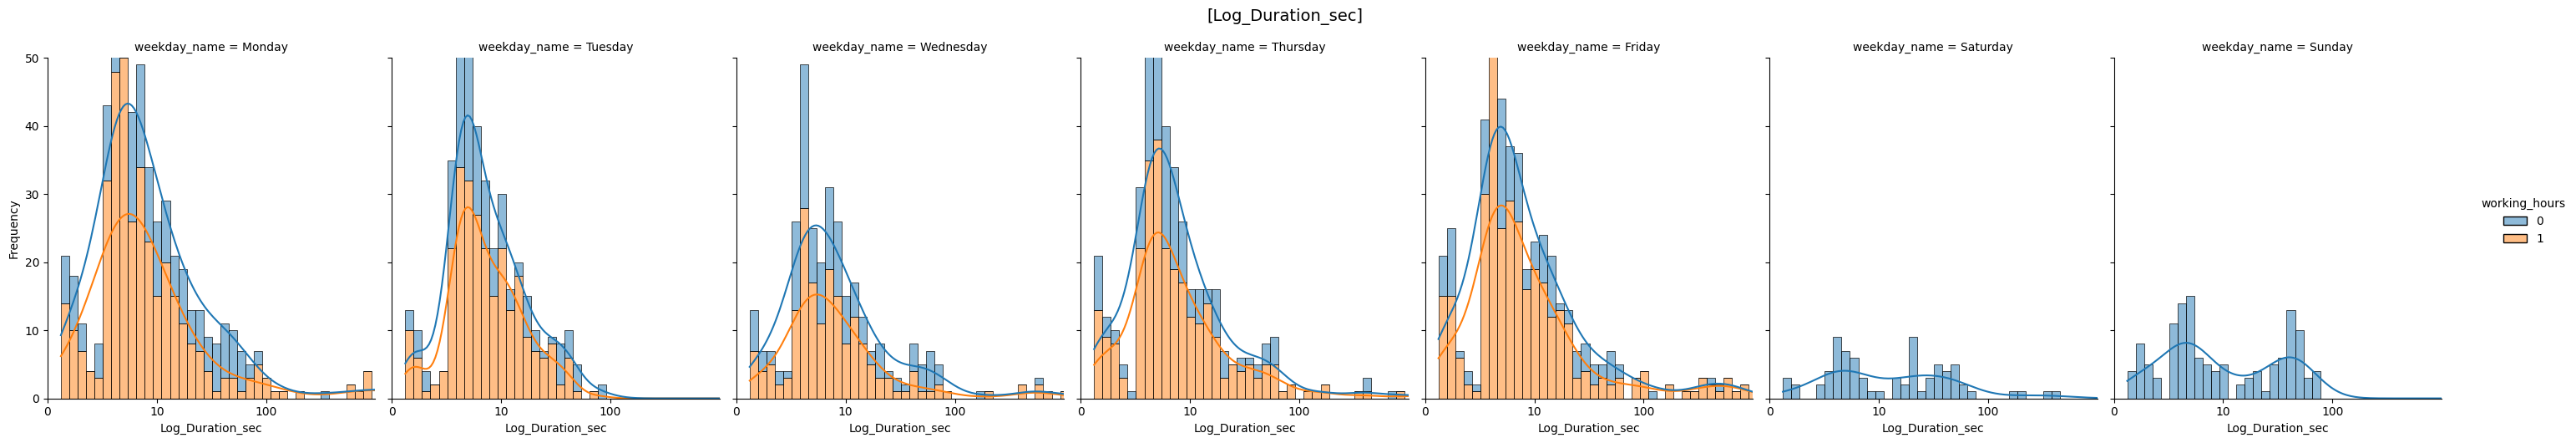

In [38]:
# Create a histogram with groupings based on Order Year
for i, v in enumerate(sorted(df_sample["Queue"].unique())):
    print(v)
    g = sns.displot(
        data=df_sample[df_sample["Queue"] == v],
        x="Log_Duration_sec",
        hue="working_hours",
        kde=True,
#         hue_order=HUE_ORDER,
        col="weekday_name",
        col_order=WEEKDAY_ORDER,
        aspect=.85,
        multiple="stack"
    )

    # Customize the plot
    g.set(xlim=(0, 3), ylim=(0, 50), xlabel="Log_Duration_sec", ylabel="Frequency")
    g.set(xticks=[0, 1, 2], xticklabels=["0", "10", "100"])
    g.fig.suptitle(f"[Log_Duration_sec]", fontsize=14, y=1.05)
    # Show the plot
    plt.show()

1


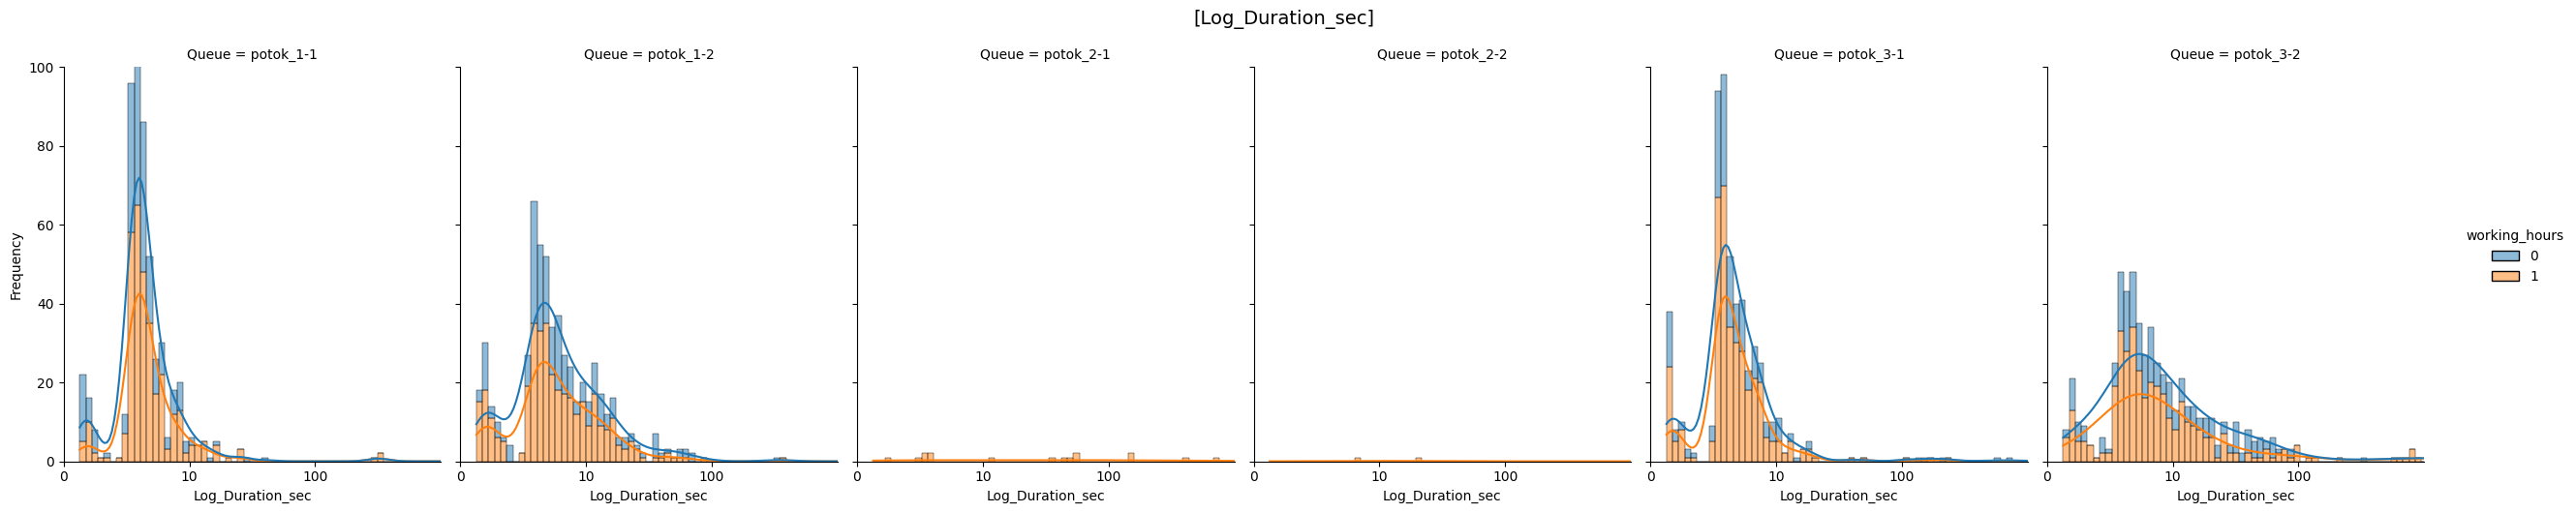

2


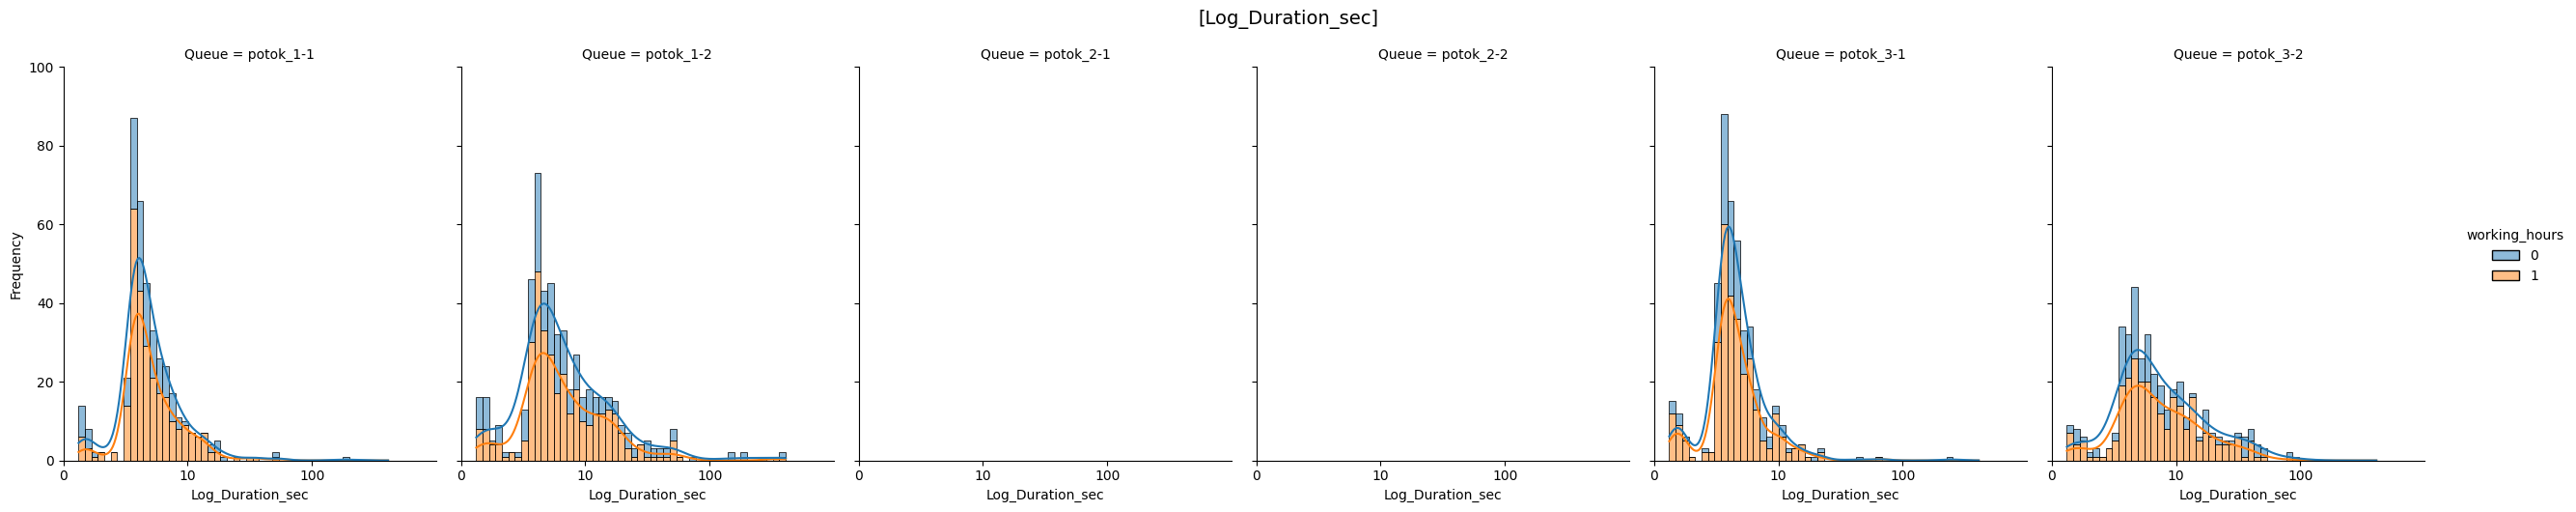

3


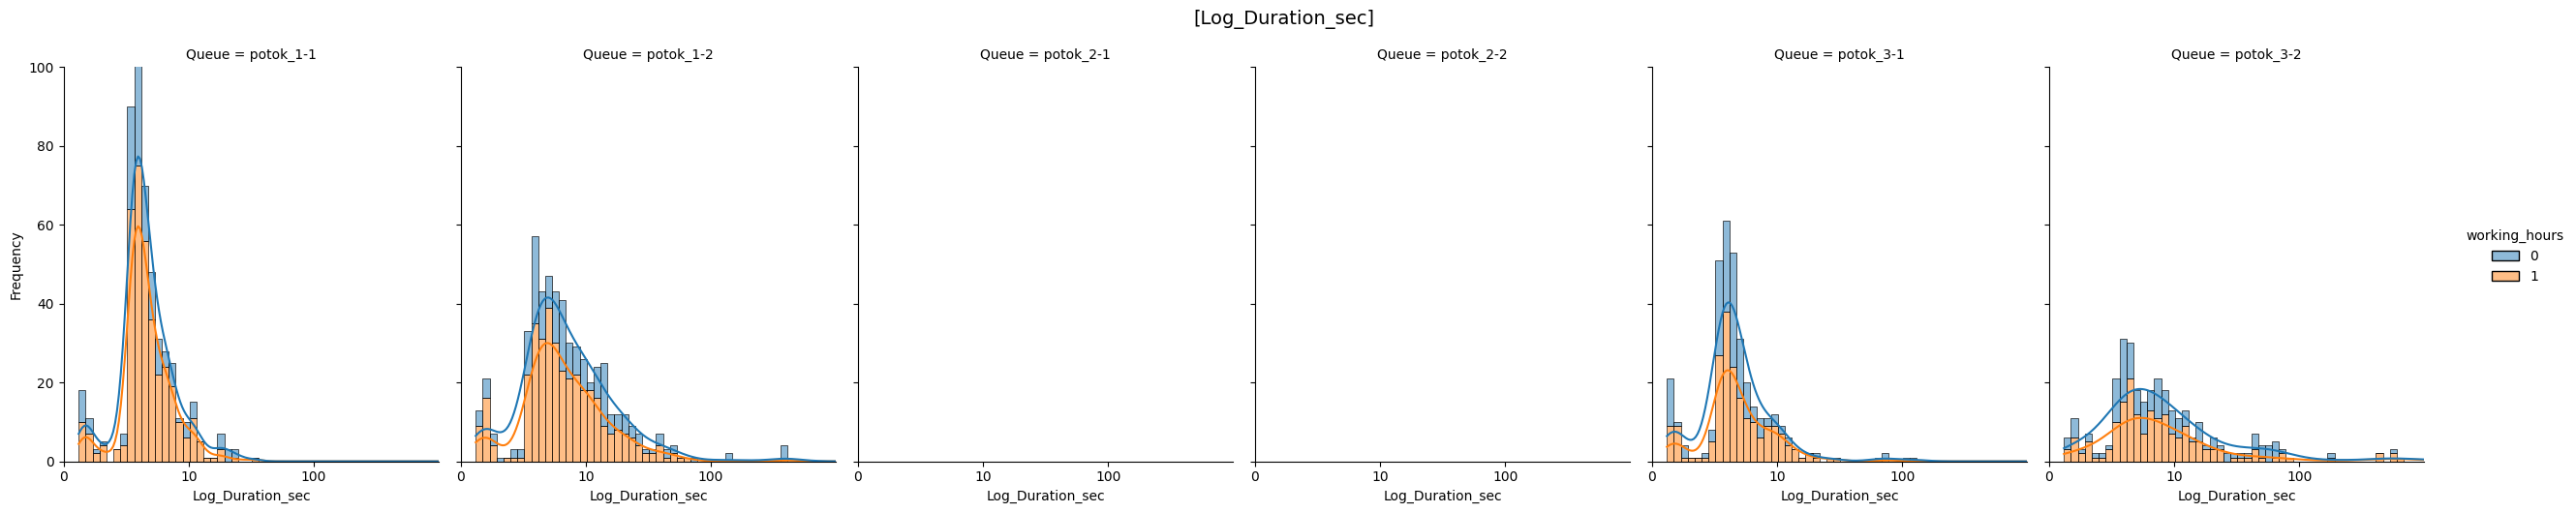

4


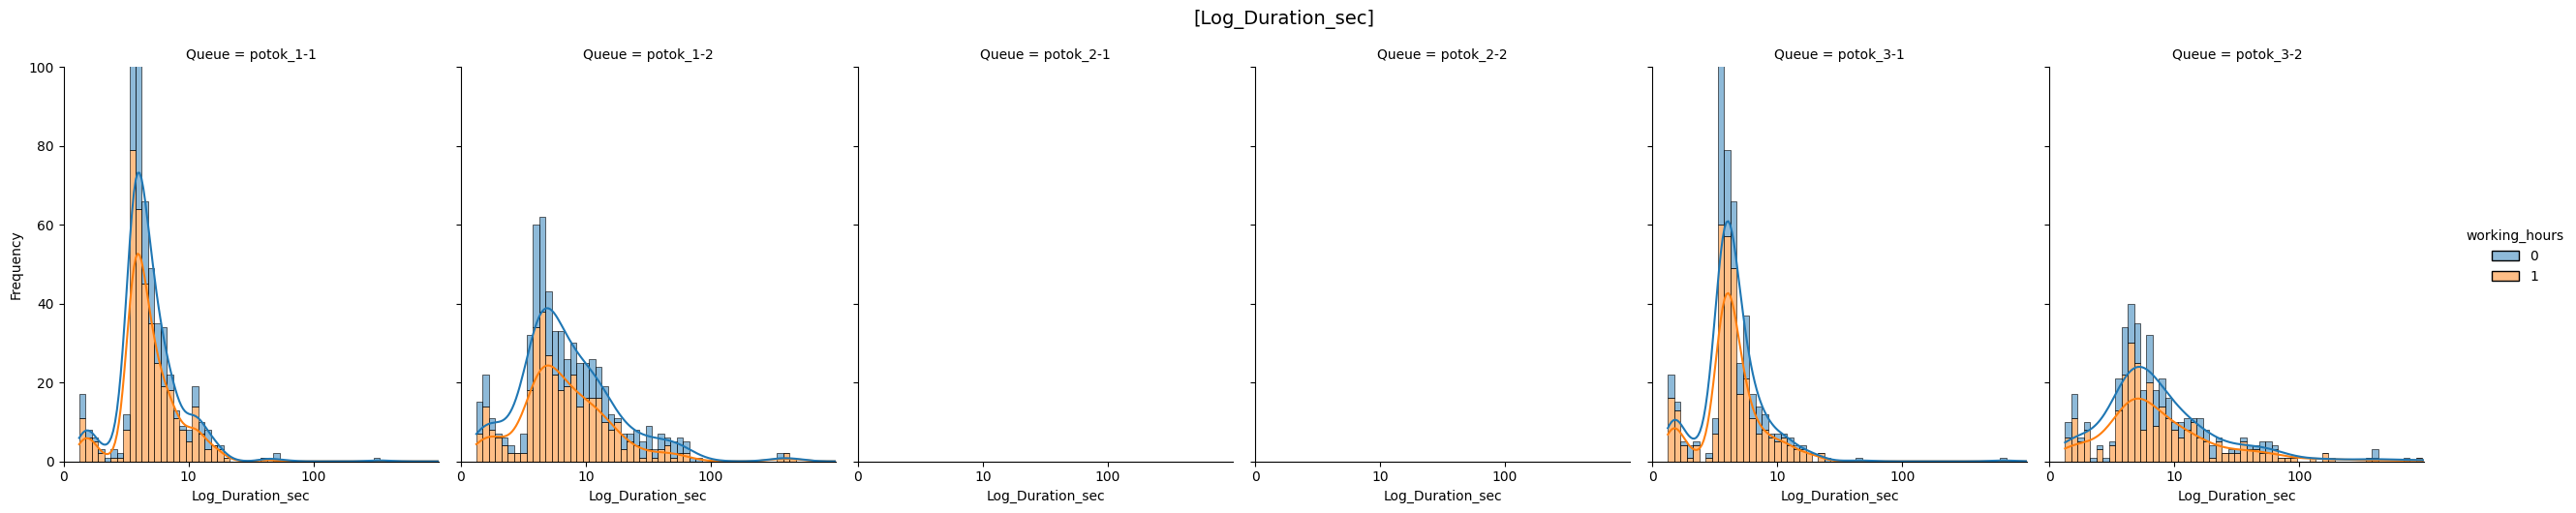

5


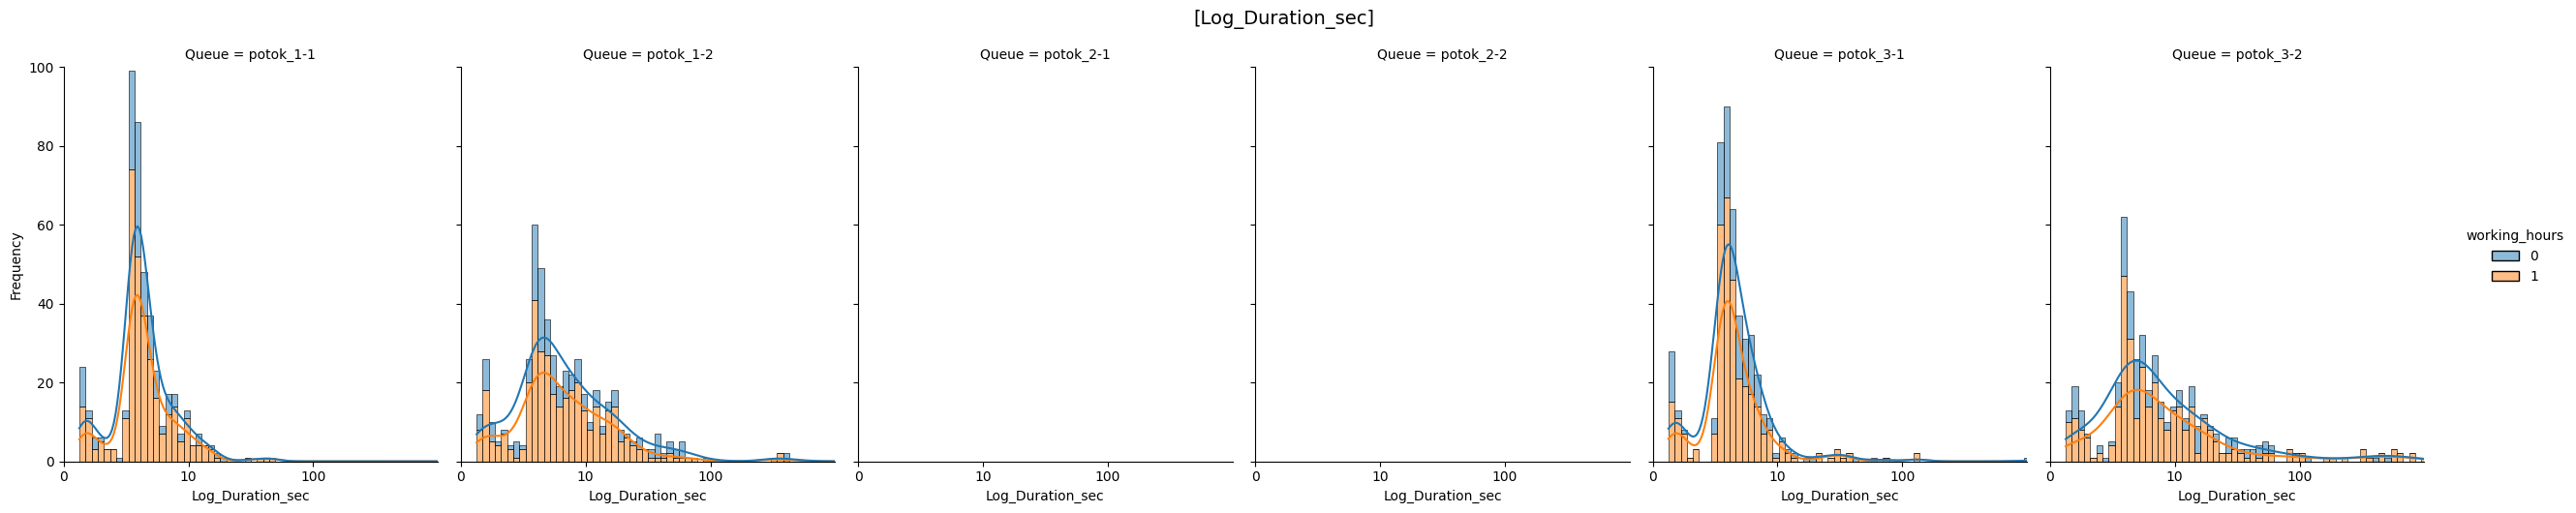

6


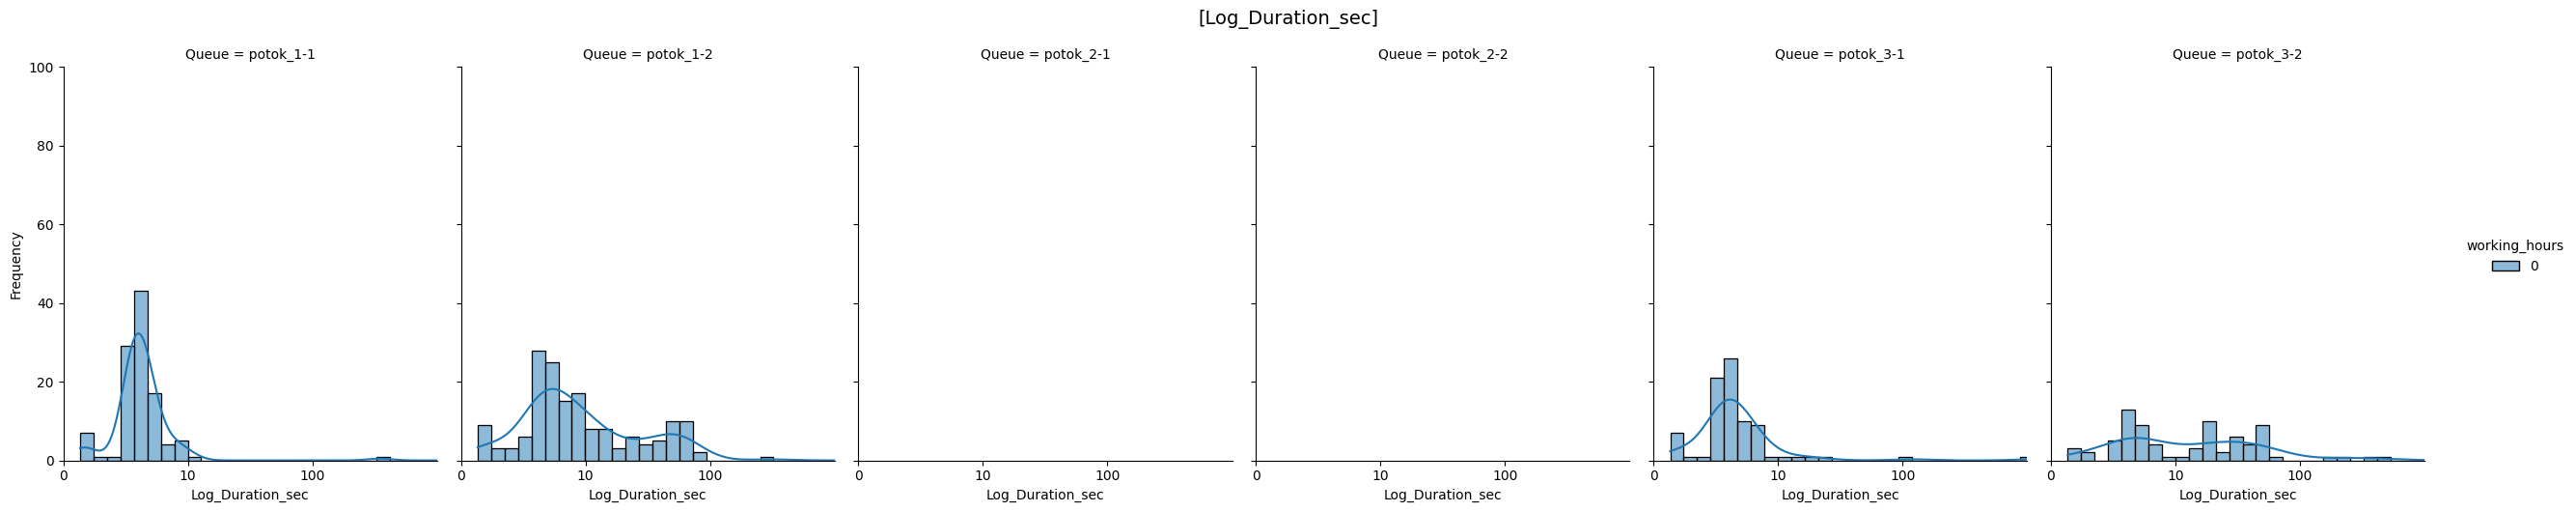

7


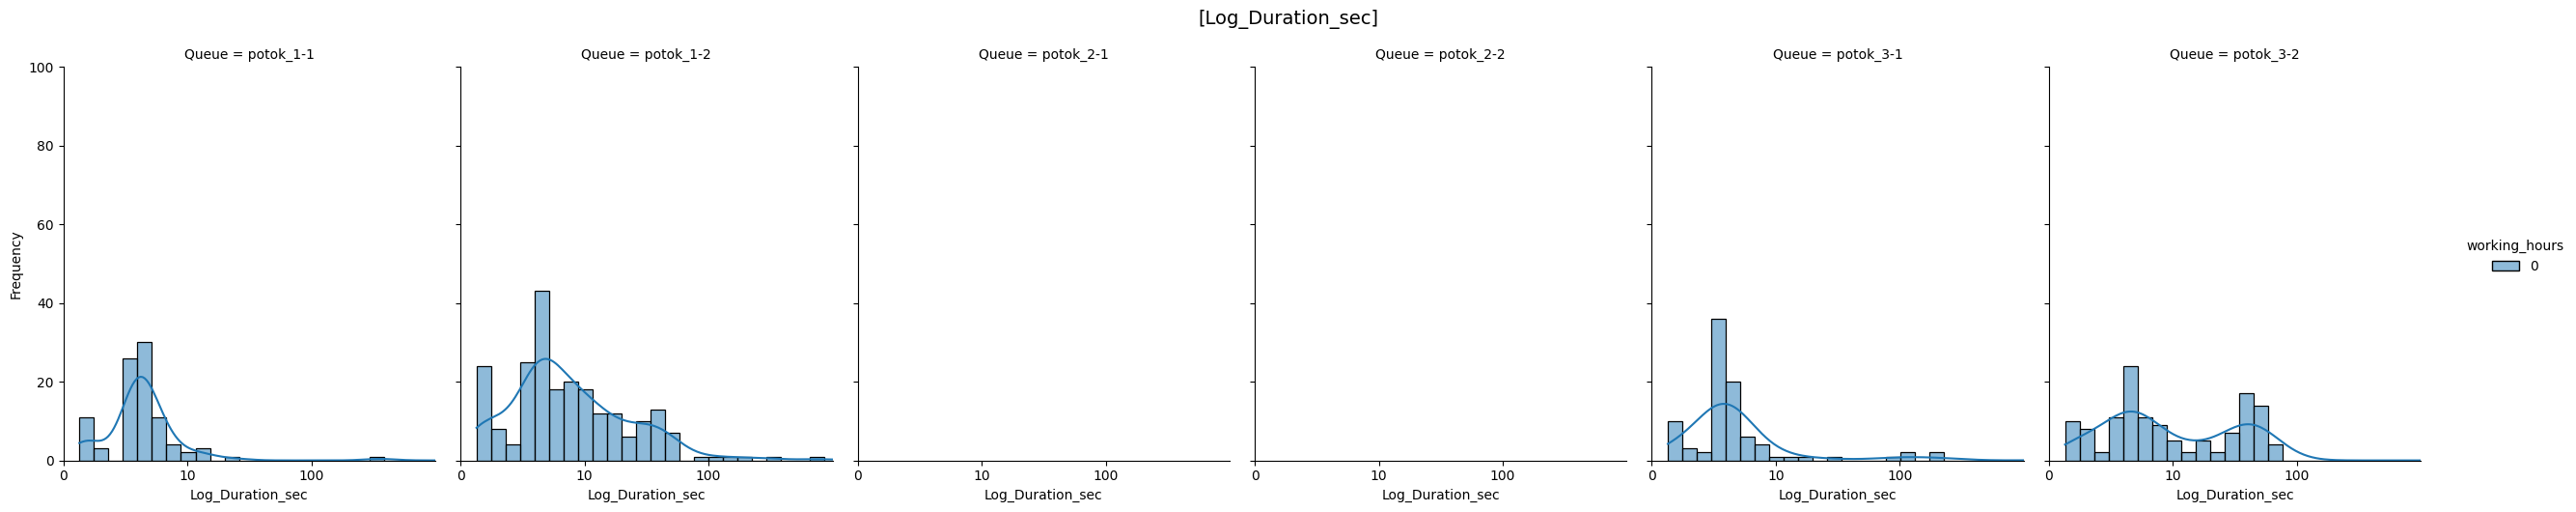

In [39]:
# Create a histogram with groupings based on Order Year
for i, v in enumerate(sorted(df_sample["weekday"].unique())):
    print(v)
    g = sns.displot(
        data=df_sample[df_sample["weekday"] == v],
        x="Log_Duration_sec",
        hue="working_hours",
        kde=True,
#         hue_order=WEEKDAY_ORDER,
        col="Queue",
        col_order=HUE_ORDER,
        aspect=.85,
        multiple="stack"
    )

    # Customize the plot
    g.set(xlim=(0, 3), ylim=(0, 100), xlabel="Log_Duration_sec", ylabel="Frequency")
    g.set(xticks=[0, 1, 2], xticklabels=["0", "10", "100"])
    g.fig.suptitle(f"[Log_Duration_sec]", fontsize=14, y=1.05)
    # Show the plot
    plt.show()

## BOX PLOTS

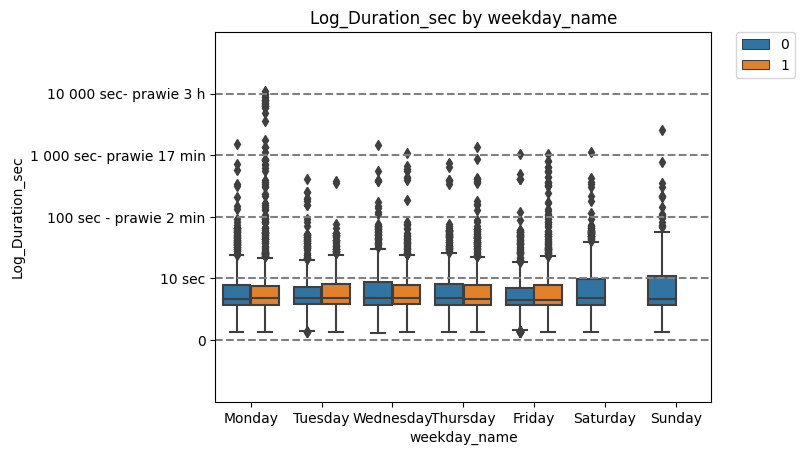

In [40]:
# Create a box plot with groupings based on Order Year
g = sns.boxplot(data=df_sample, x="weekday_name", y="Log_Duration_sec", hue="working_hours", order=WEEKDAY_ORDER)

# Customize the plot
g.set(ylim=(-1, 5), xlabel="weekday_name", ylabel="Log_Duration_sec", title="Log_Duration_sec by weekday_name")

g.set(yticks=[0, 1, 2, 3, 4], yticklabels=["0", "10 sec", "100 sec - prawie 2 min", "1 000 sec- prawie 17 min", "10 000 sec- prawie 3 h"])
# Move the legend outside the chart box
# Add horizontal lines at each ytick
yticks = plt.yticks()[0]
for ytick in yticks:
    plt.axhline(ytick, color='gray', linestyle='--')

# Move the legend outside the chart box
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

February
March


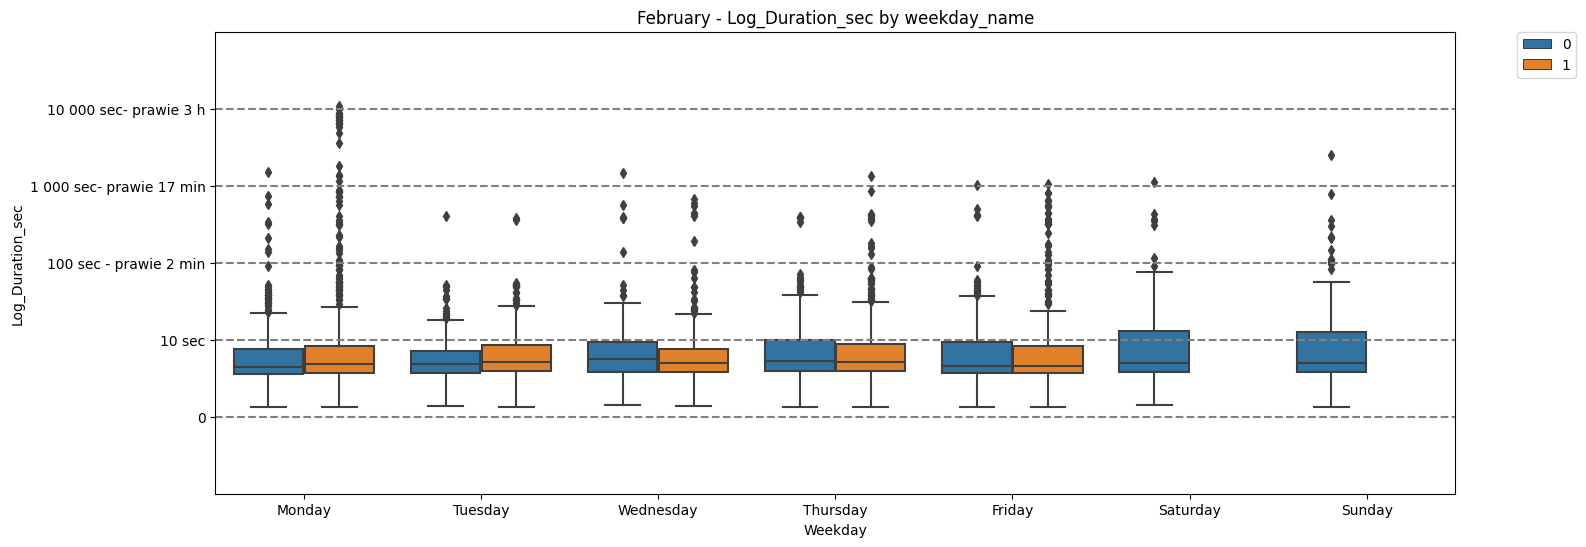

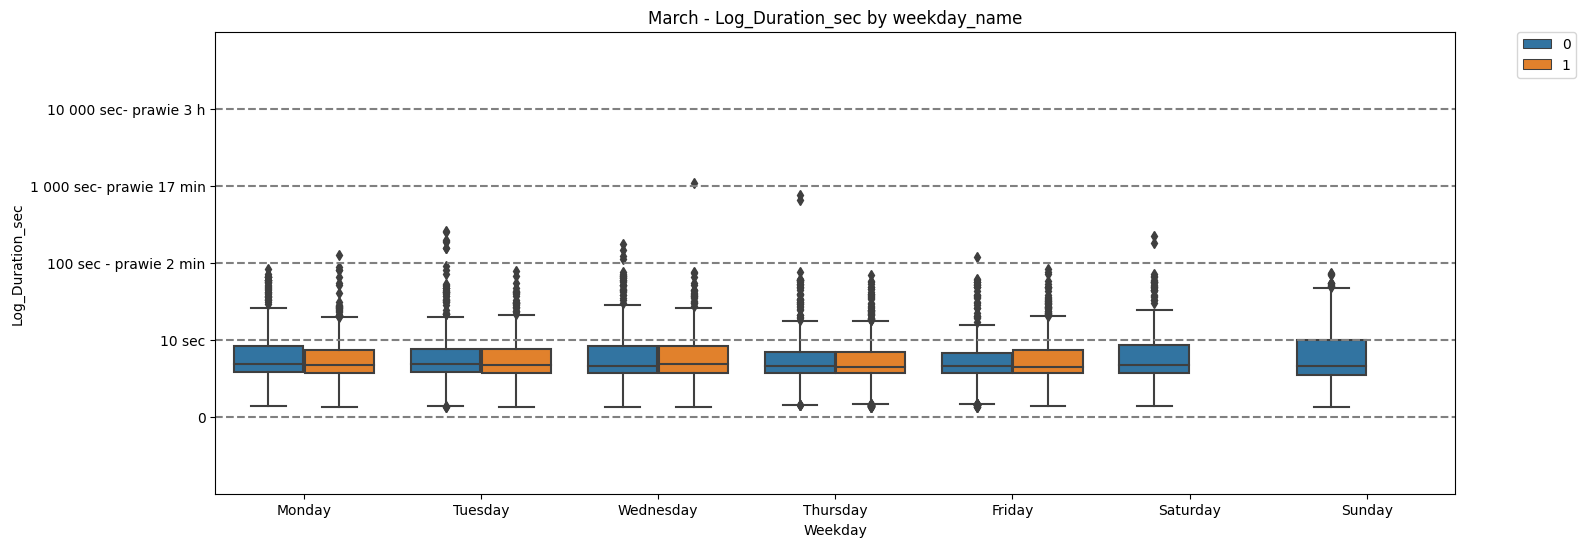

In [41]:
for i, v in enumerate(sorted(df_sample["month_name"].unique())):
    print(v)

    # Set the figure size
    plt.figure(figsize=(16, 6))

    # Check if dataframe is not empty before creating the boxplot
    if not df_sample[df_sample["month_name"] == v].empty:
        # Create a box plot with groupings based on Order Year
        g = sns.boxplot(data=df_sample[df_sample["month_name"] == v], x="weekday_name", y="Log_Duration_sec", hue="working_hours", order=WEEKDAY_ORDER)

        # Customize the plot
        g.set(ylim=(-1, 5), xlabel="Weekday", ylabel="Log_Duration_sec", title=f"{v} - Log_Duration_sec by weekday_name")
        g.set(yticks=[0, 1, 2, 3, 4], yticklabels=["0", "10 sec", "100 sec - prawie 2 min", "1 000 sec- prawie 17 min", "10 000 sec- prawie 3 h"])
        # Add horizontal lines at each ytick
        yticks = plt.yticks()[0]
        for ytick in yticks:
            plt.axhline(ytick, color='gray', linestyle='--')
        # Move the legend outside the chart box
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


5
6
7
8
9
10
11
12
13


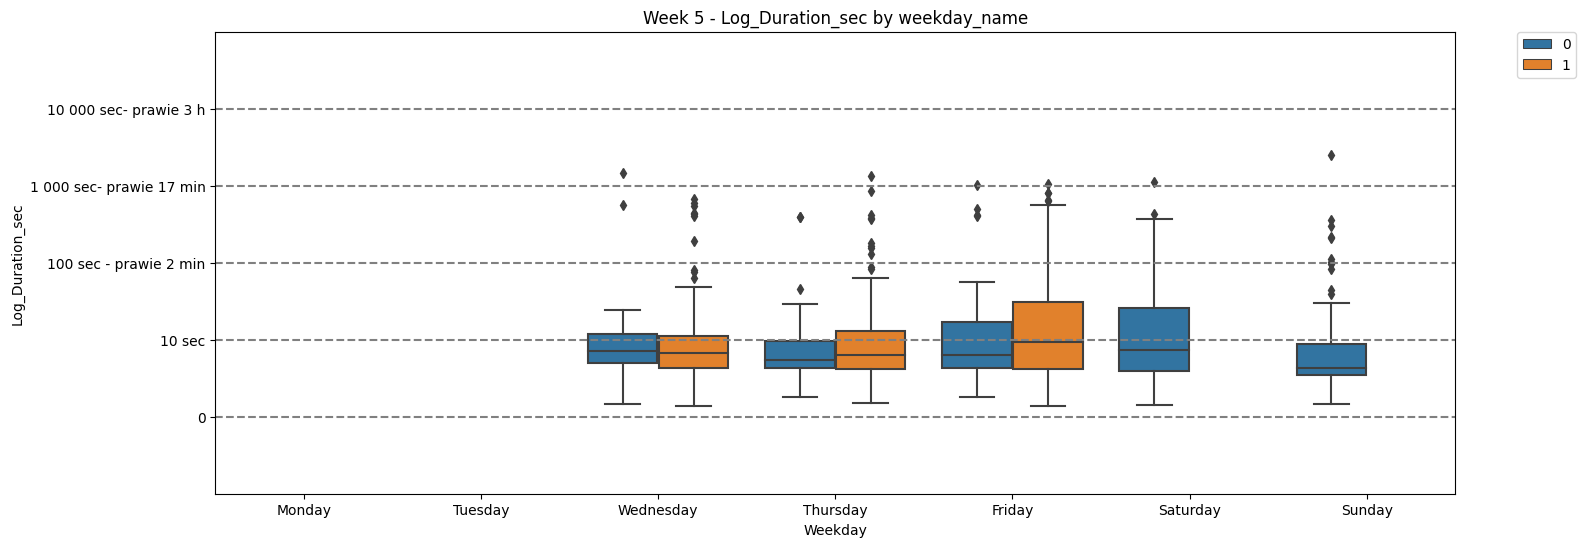

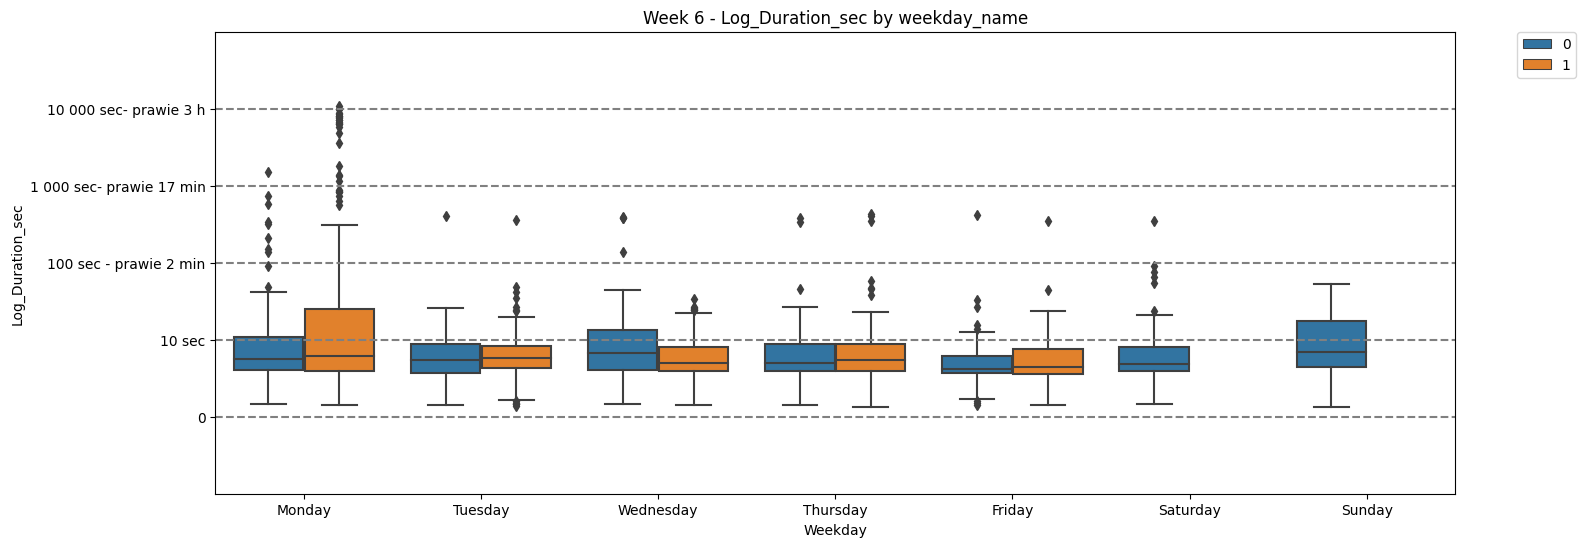

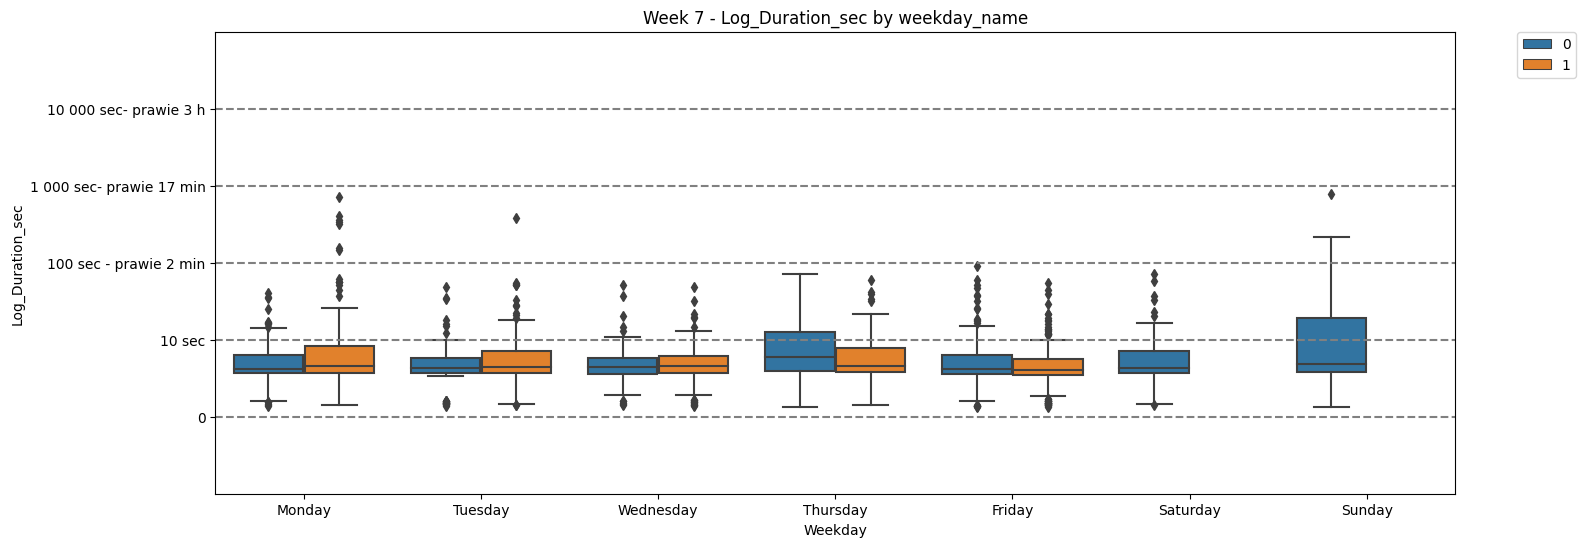

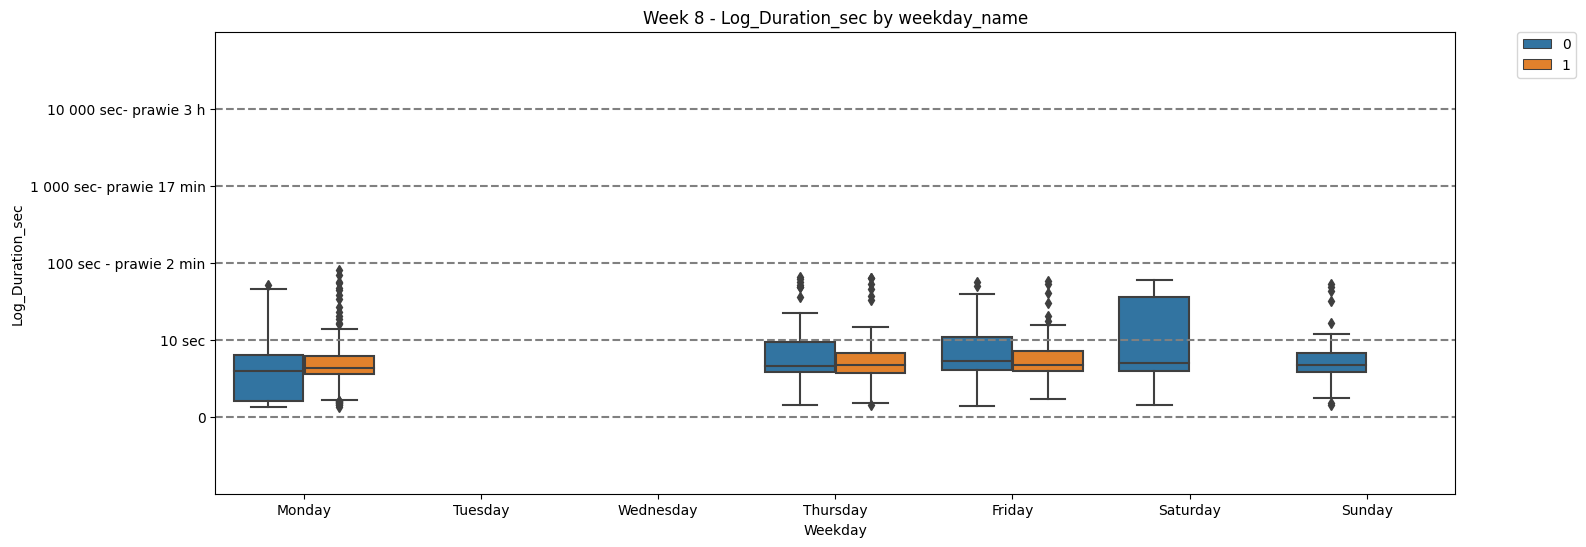

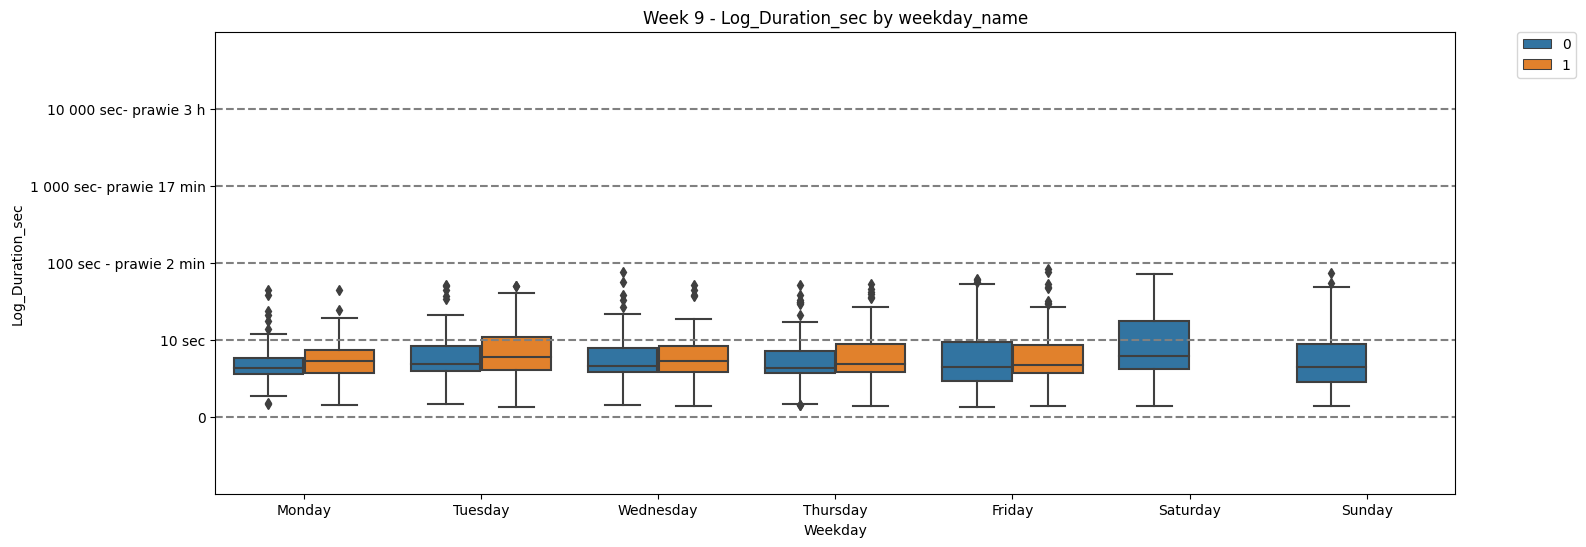

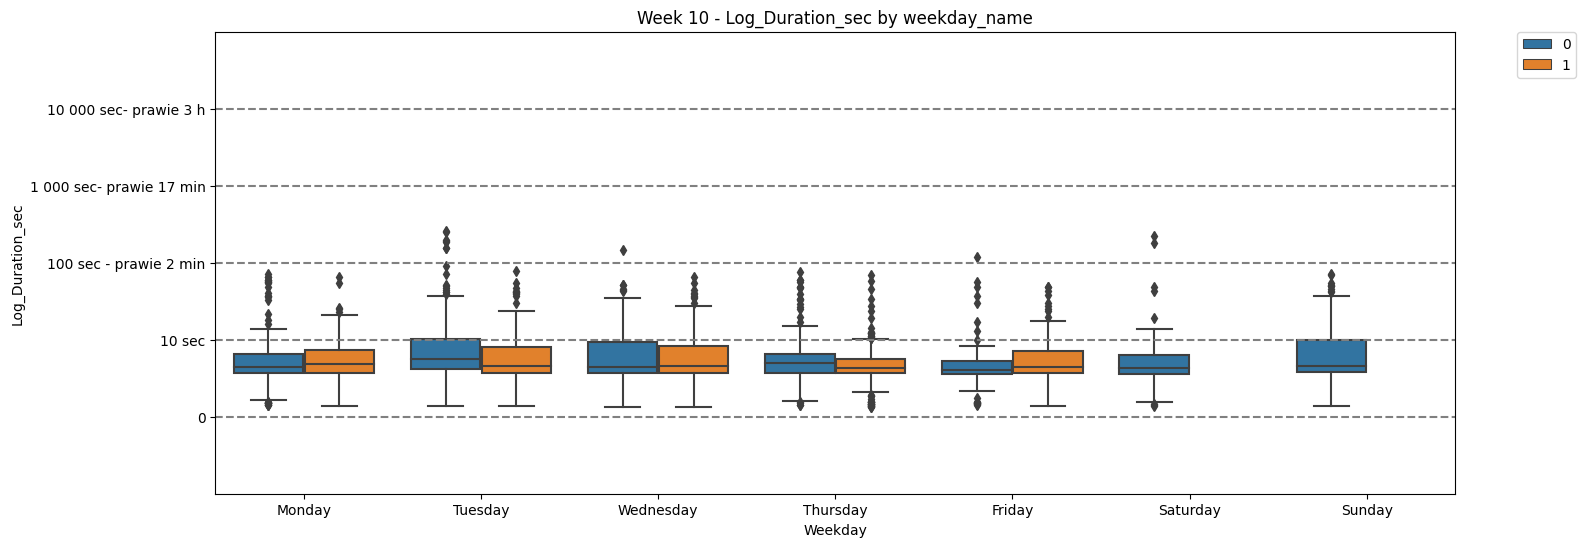

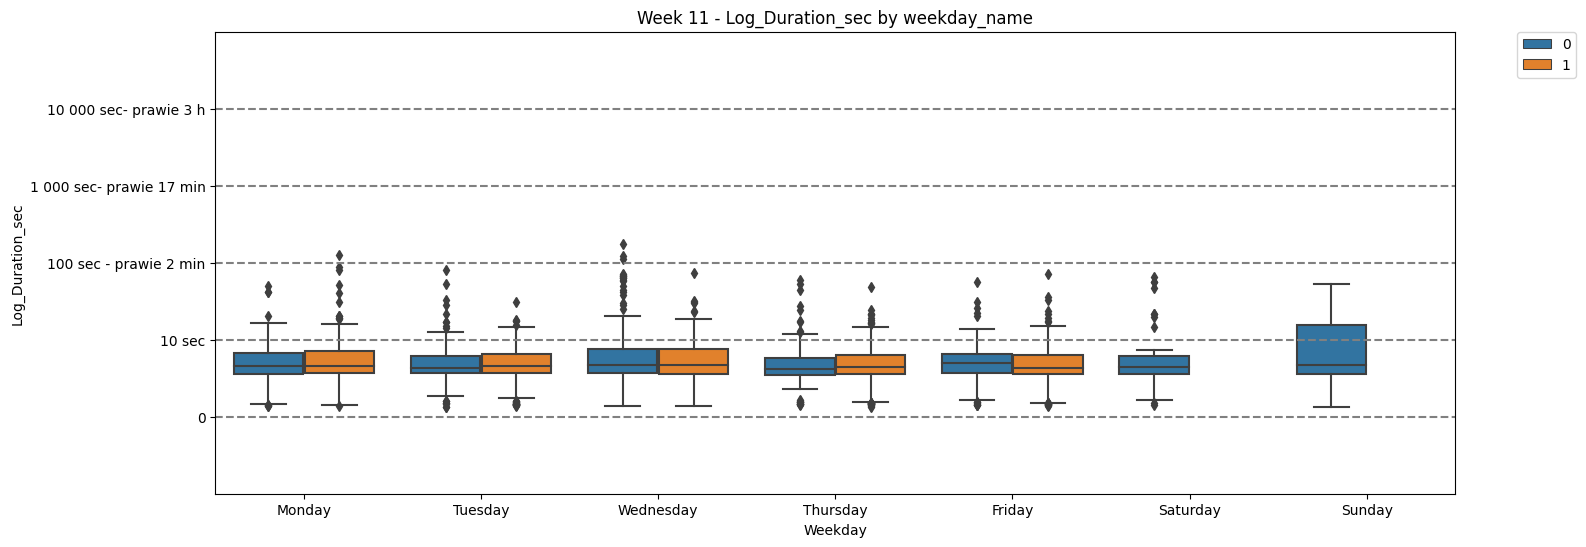

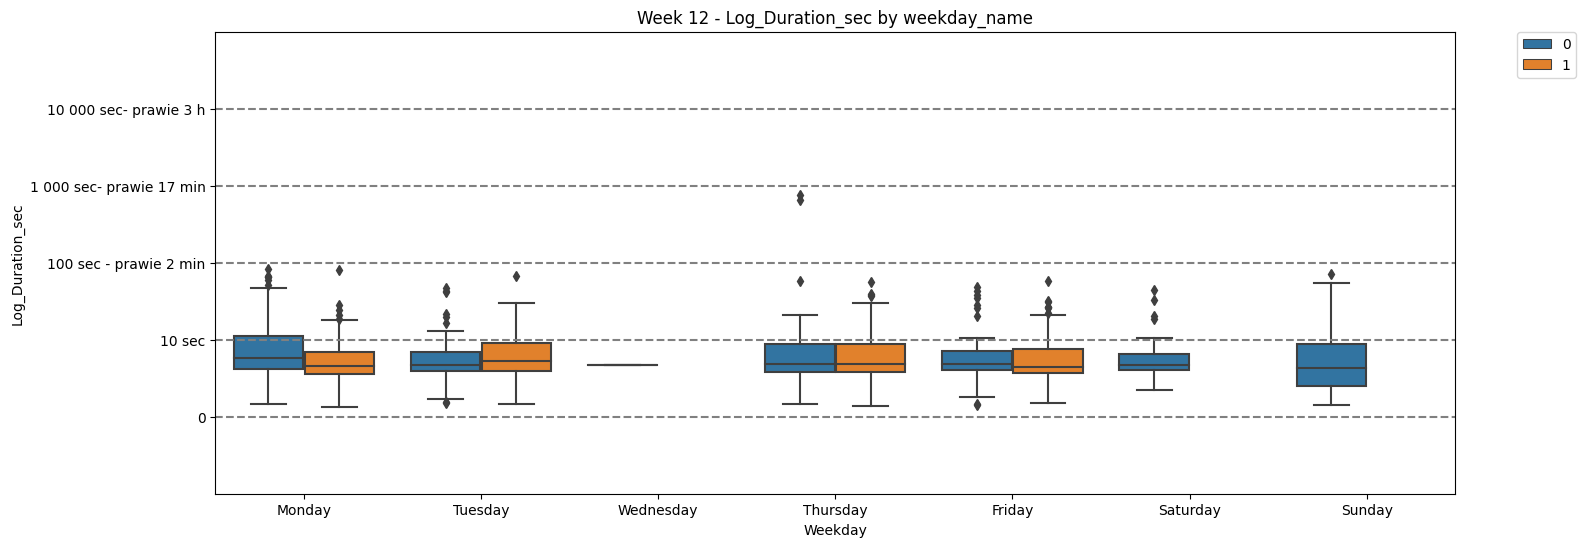

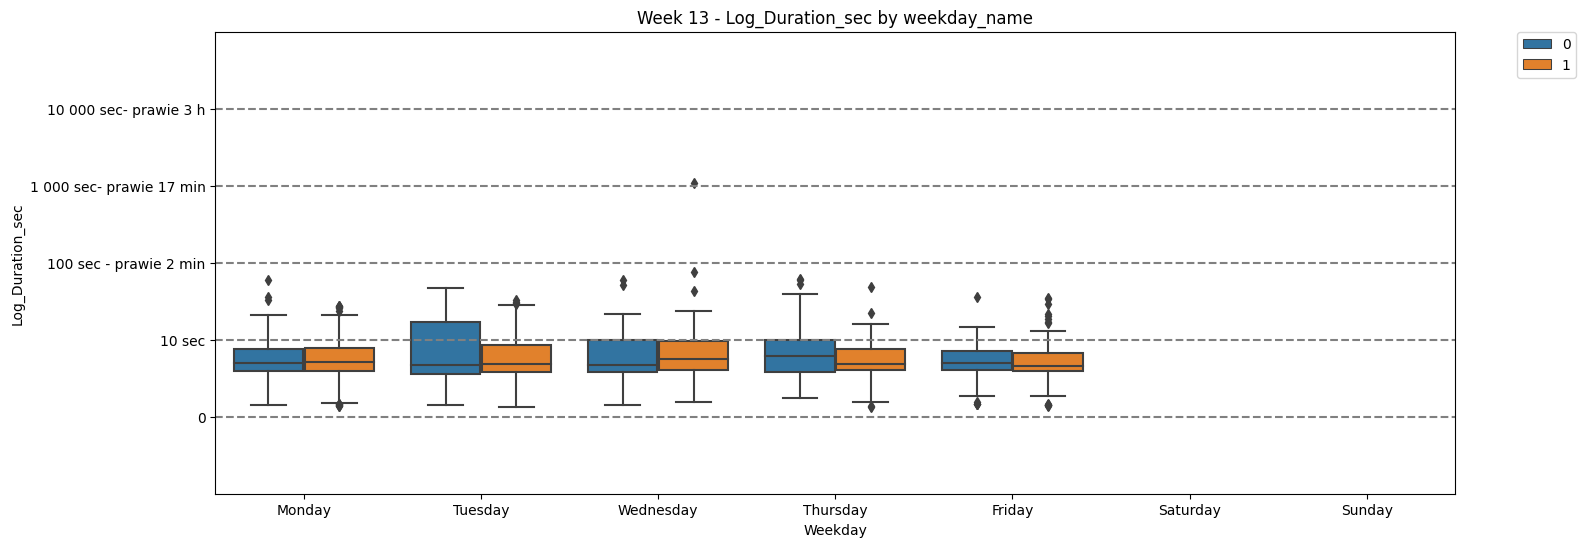

In [42]:
for i, v in enumerate(sorted(df_sample["week"].unique())):
    print(v)

    # Set the figure size
    plt.figure(figsize=(16, 6))

    # Check if dataframe is not empty before creating the boxplot
    if not df_sample[df_sample["week"] == v].empty:
        # Create a box plot with groupings based on Order Year
        g = sns.boxplot(data=df_sample[df_sample["week"] == v], x="weekday_name", y="Log_Duration_sec", hue="working_hours", order=WEEKDAY_ORDER)

        # Customize the plot
        g.set(ylim=(-1, 5), xlabel="Weekday", ylabel="Log_Duration_sec", title=f"Week {v} - Log_Duration_sec by weekday_name")
        g.set(yticks=[0, 1, 2, 3, 4], yticklabels=["0", "10 sec", "100 sec - prawie 2 min", "1 000 sec- prawie 17 min", "10 000 sec- prawie 3 h"])
        # Add horizontal lines at each ytick
        yticks = plt.yticks()[0]
        for ytick in yticks:
            plt.axhline(ytick, color='gray', linestyle='--')
        # Move the legend outside the chart box
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


5
6
7
8
9
10
11
12
13


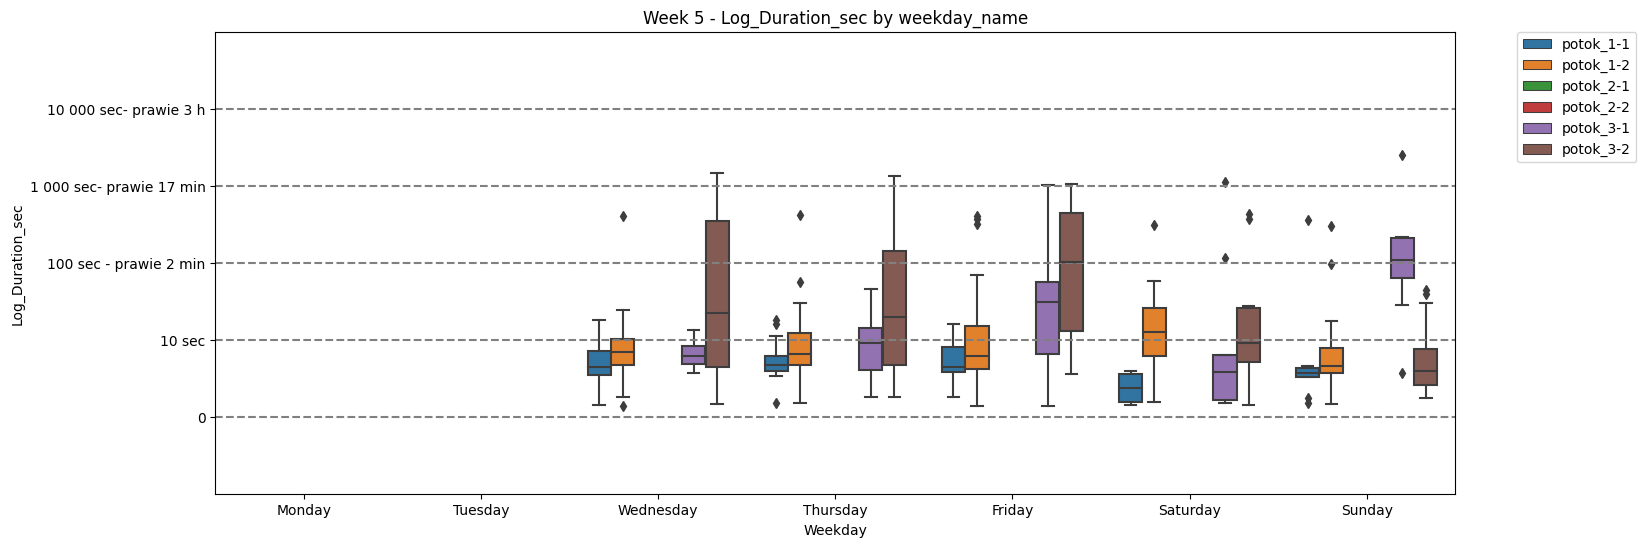

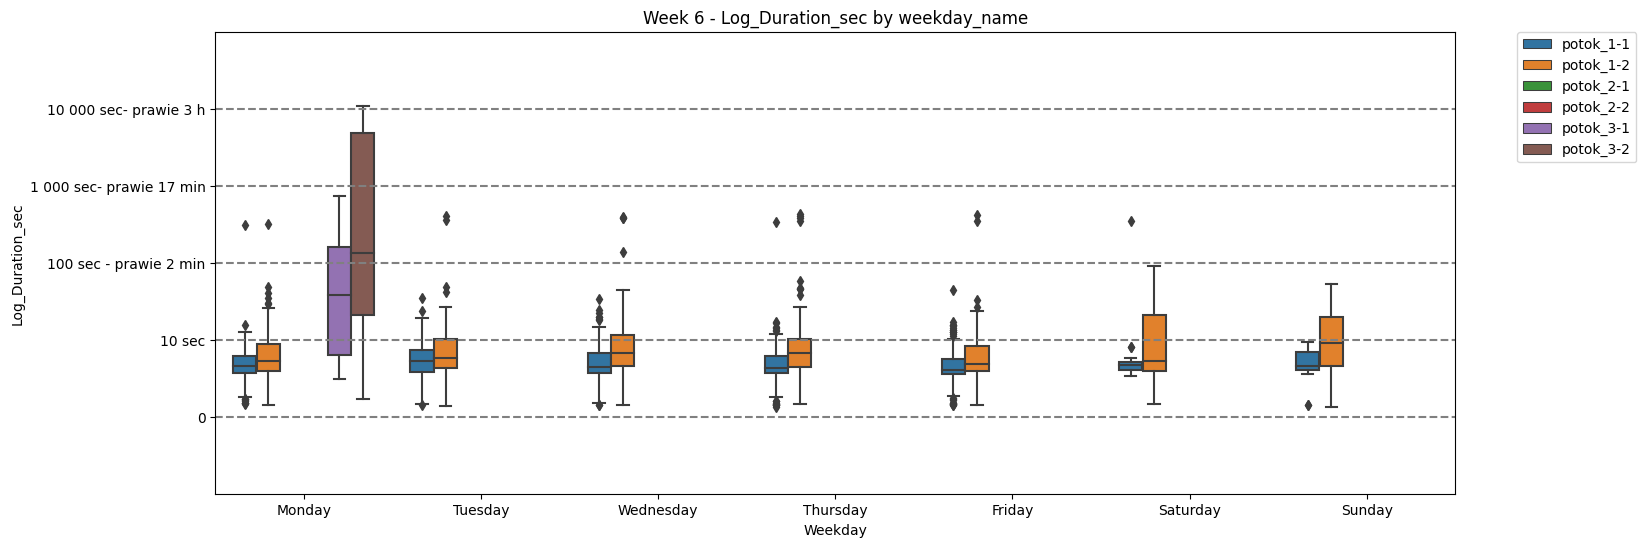

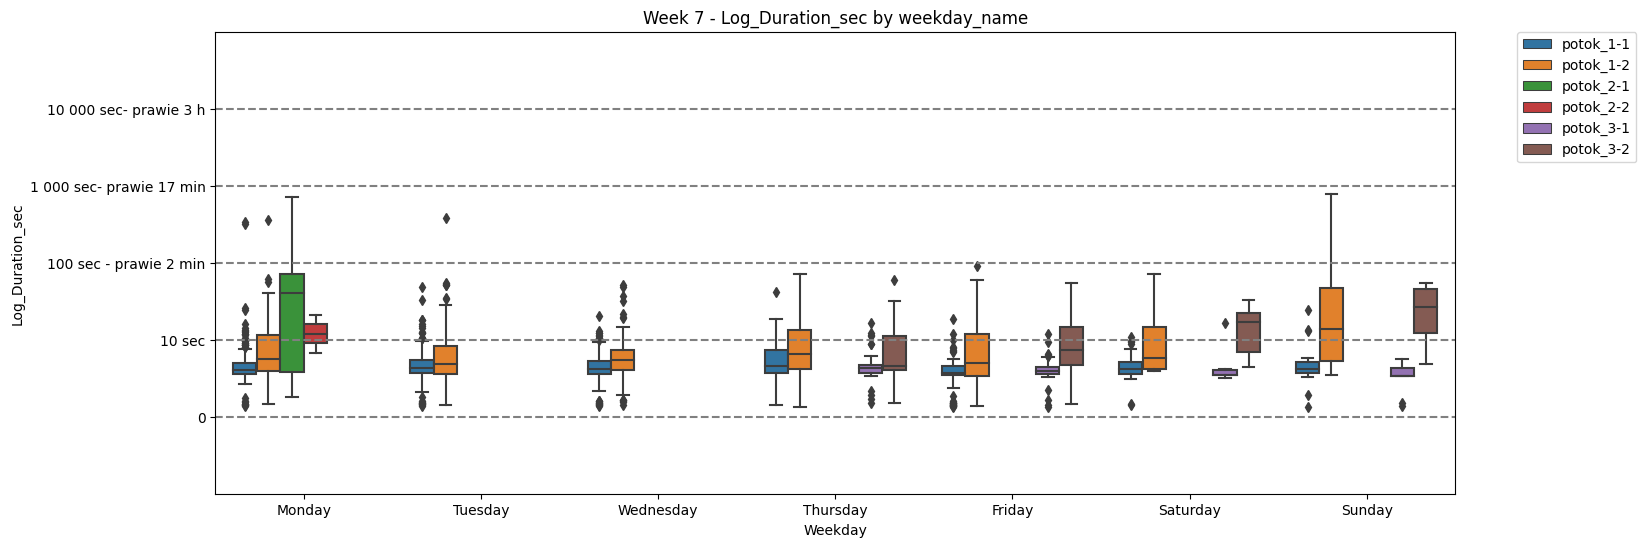

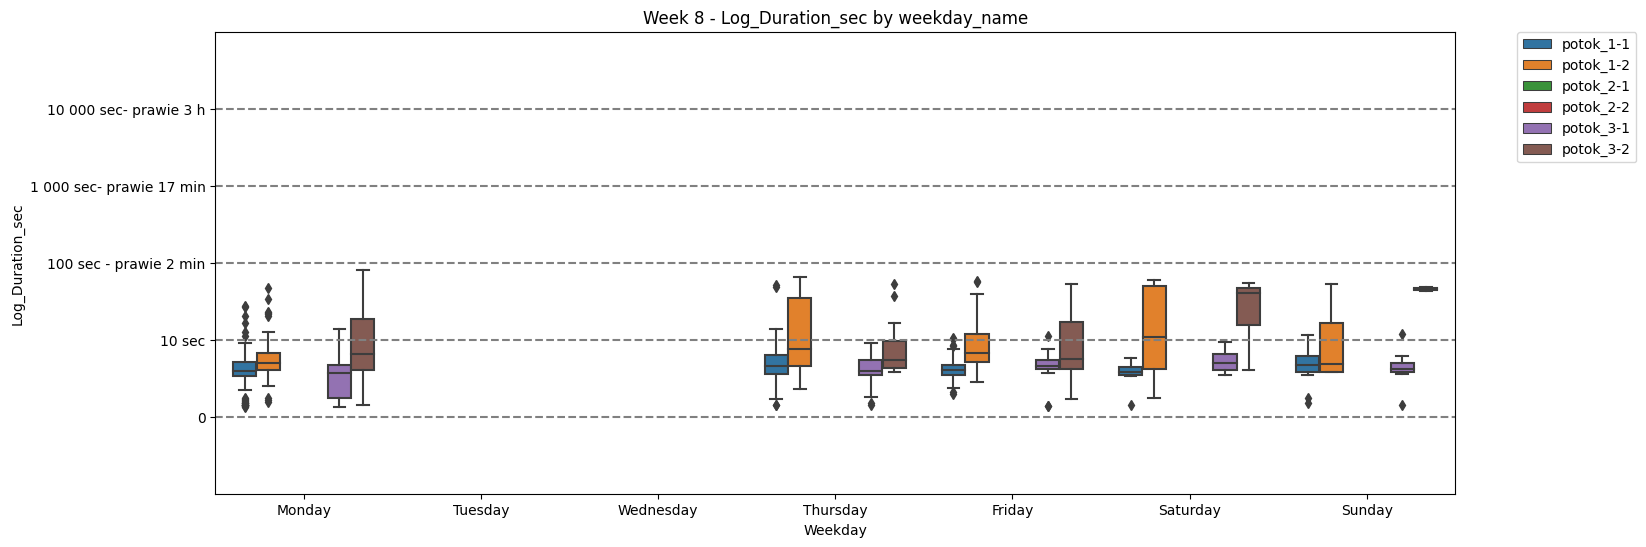

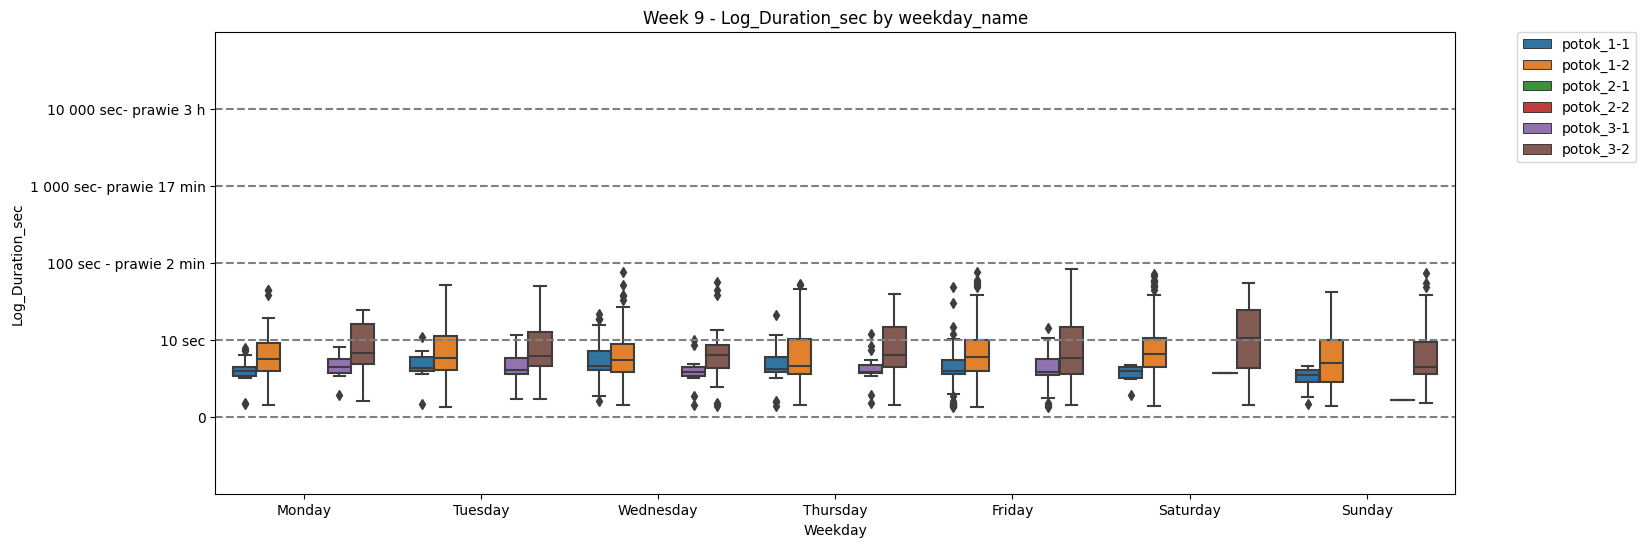

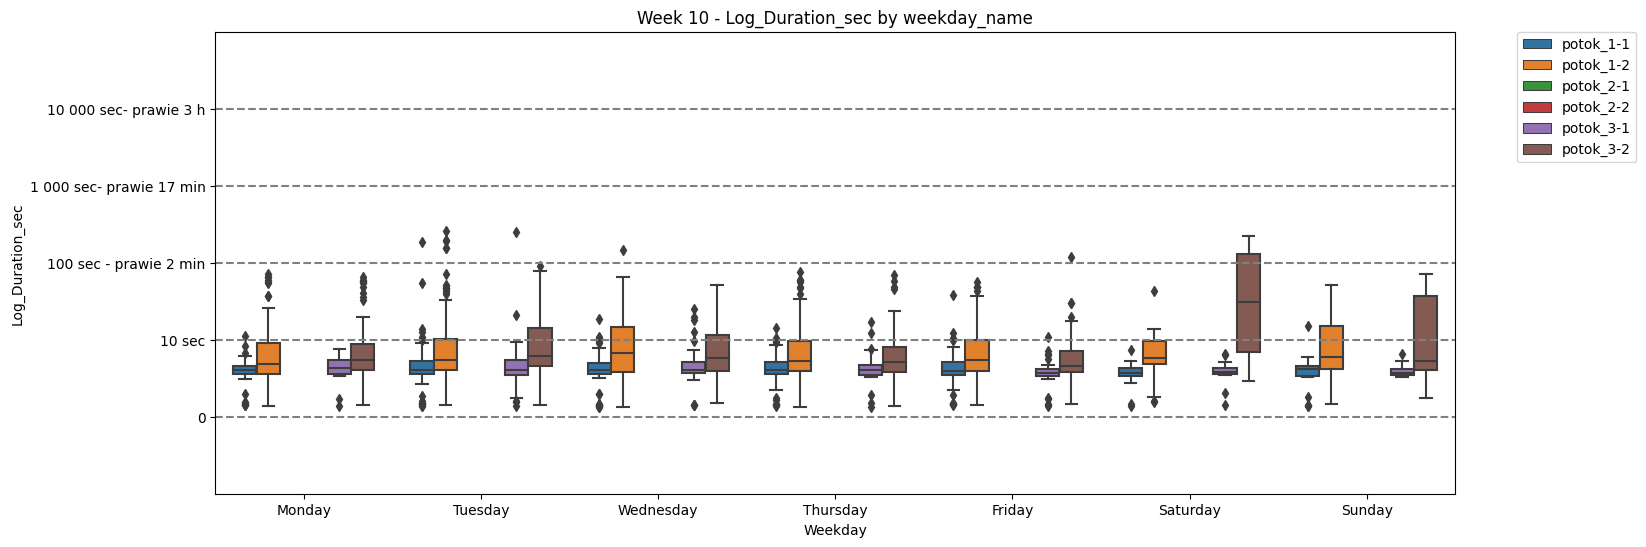

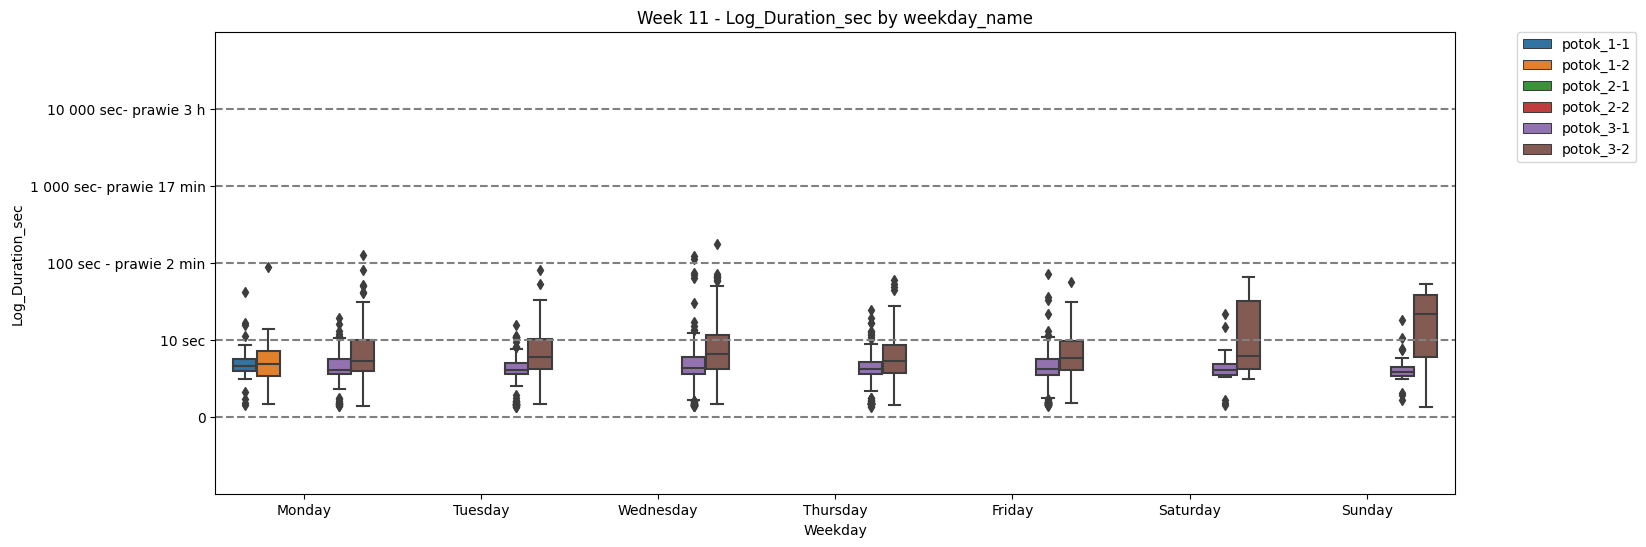

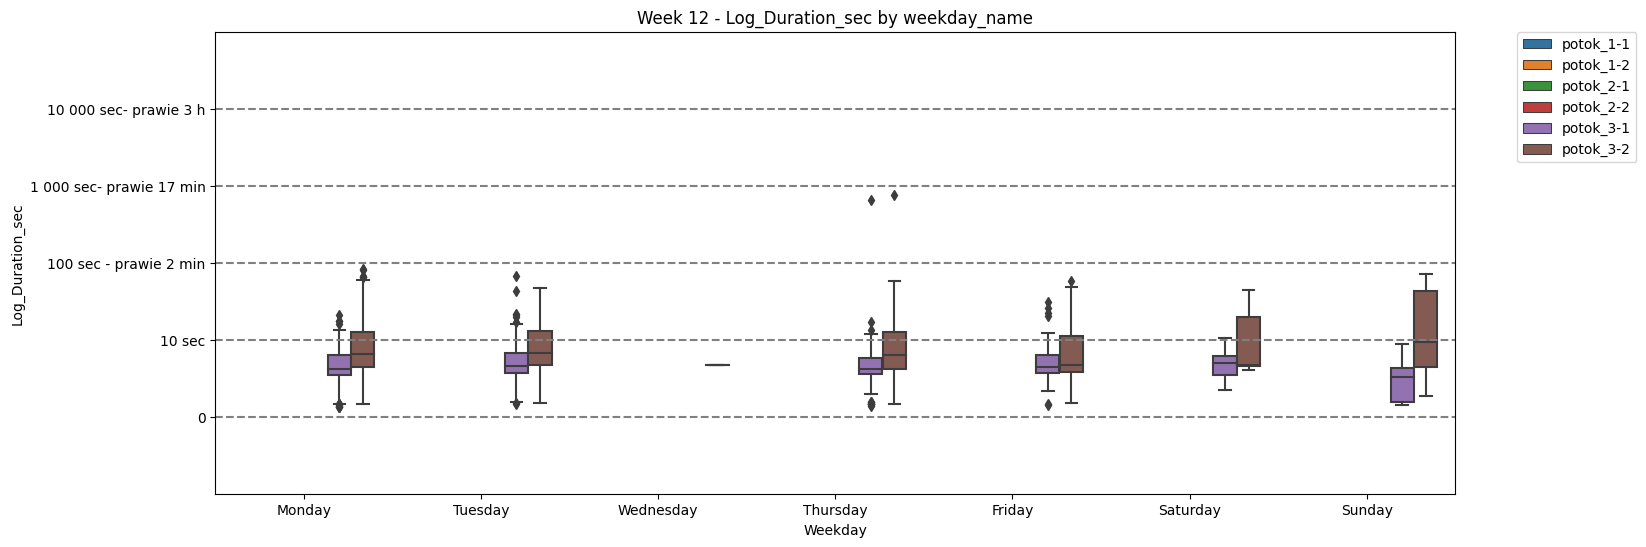

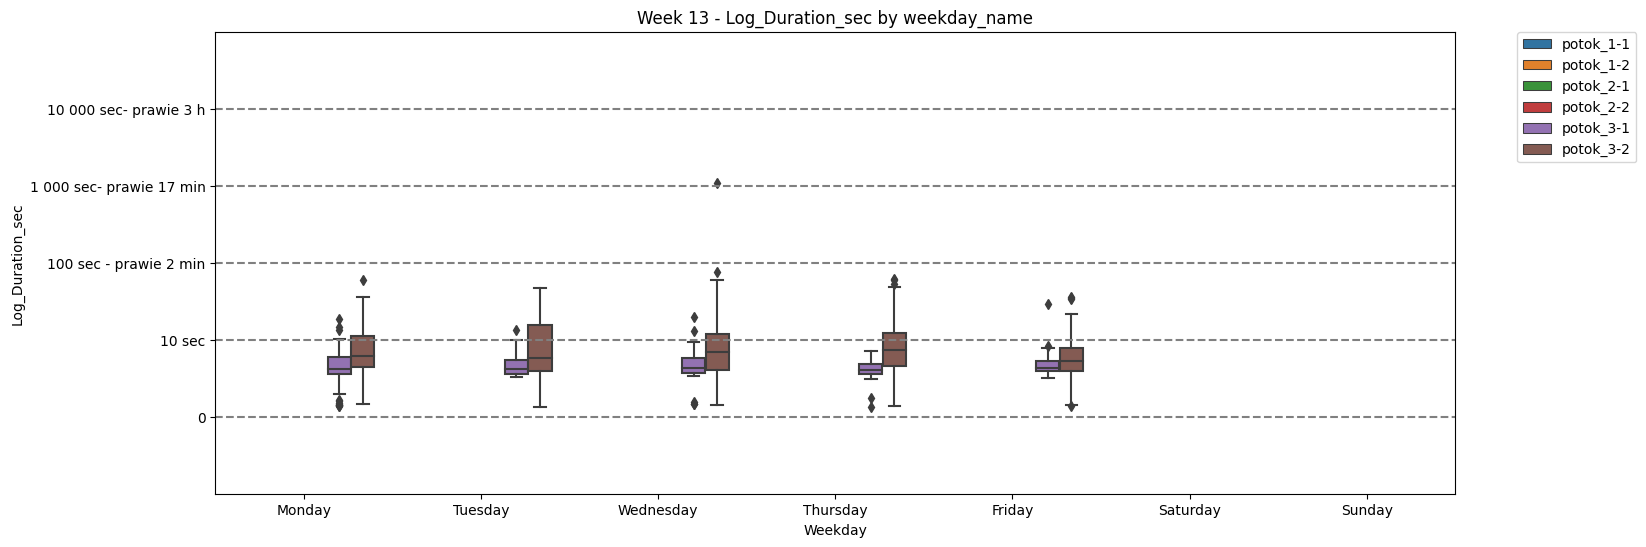

In [43]:
for i, v in enumerate(sorted(df_sample["week"].unique())):
    print(v)

    # Set the figure size
    plt.figure(figsize=(16, 6))

    # Check if dataframe is not empty before creating the boxplot
    if not df_sample[df_sample["week"] == v].empty:
        # Create a box plot with groupings based on Order Year
        g = sns.boxplot(data=df_sample[df_sample["week"] == v], x="weekday_name", y="Log_Duration_sec", order=WEEKDAY_ORDER, hue="Queue", hue_order=HUE_ORDER)

        # Customize the plot
        g.set(ylim=(-1, 5), xlabel="Weekday", ylabel="Log_Duration_sec", title=f"Week {v} - Log_Duration_sec by weekday_name")
        g.set(yticks=[0, 1, 2, 3, 4], yticklabels=["0", "10 sec", "100 sec - prawie 2 min", "1 000 sec- prawie 17 min", "10 000 sec- prawie 3 h"])
        # Add horizontal lines at each ytick
        yticks = plt.yticks()[0]
        for ytick in yticks:
            plt.axhline(ytick, color='gray', linestyle='--')
        # Move the legend outside the chart box
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


5
6
7
8
9
10
11
12
13


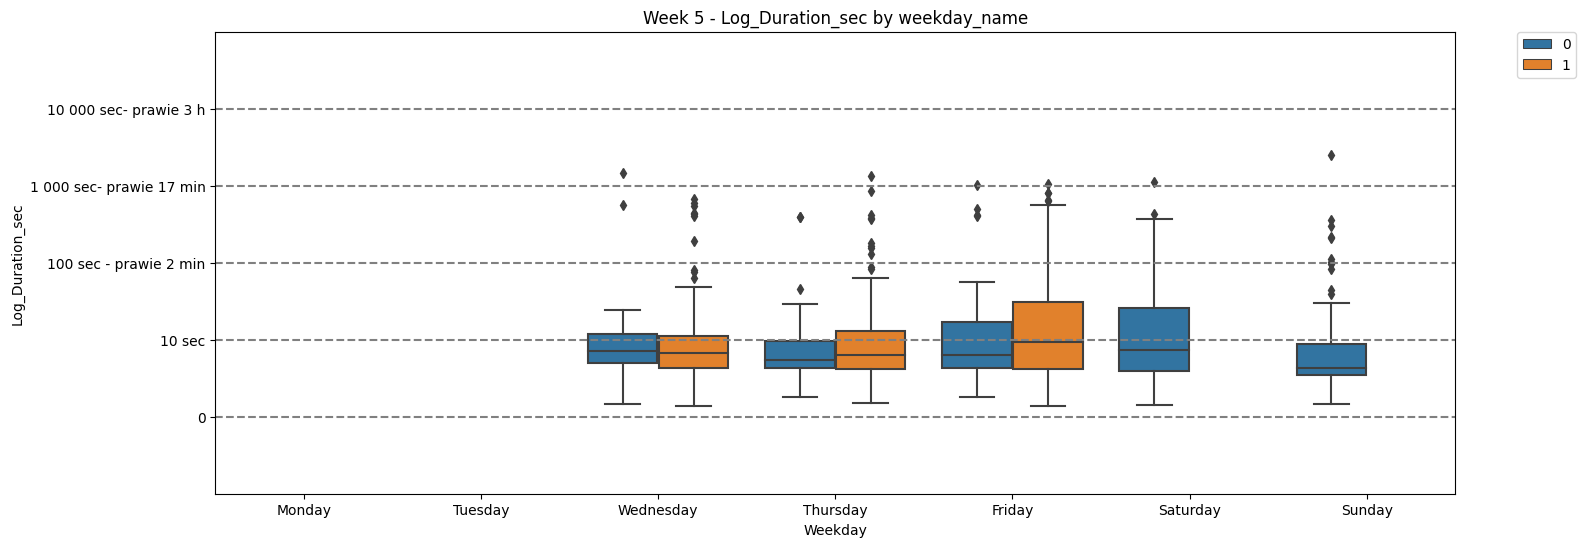

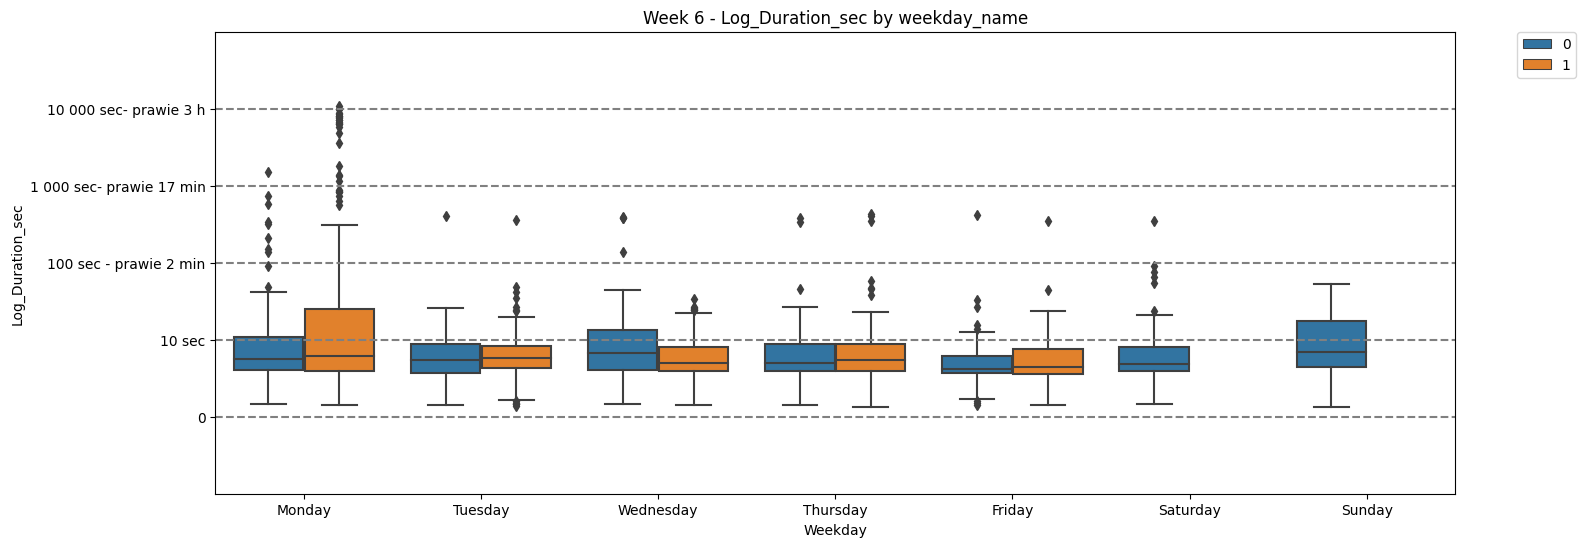

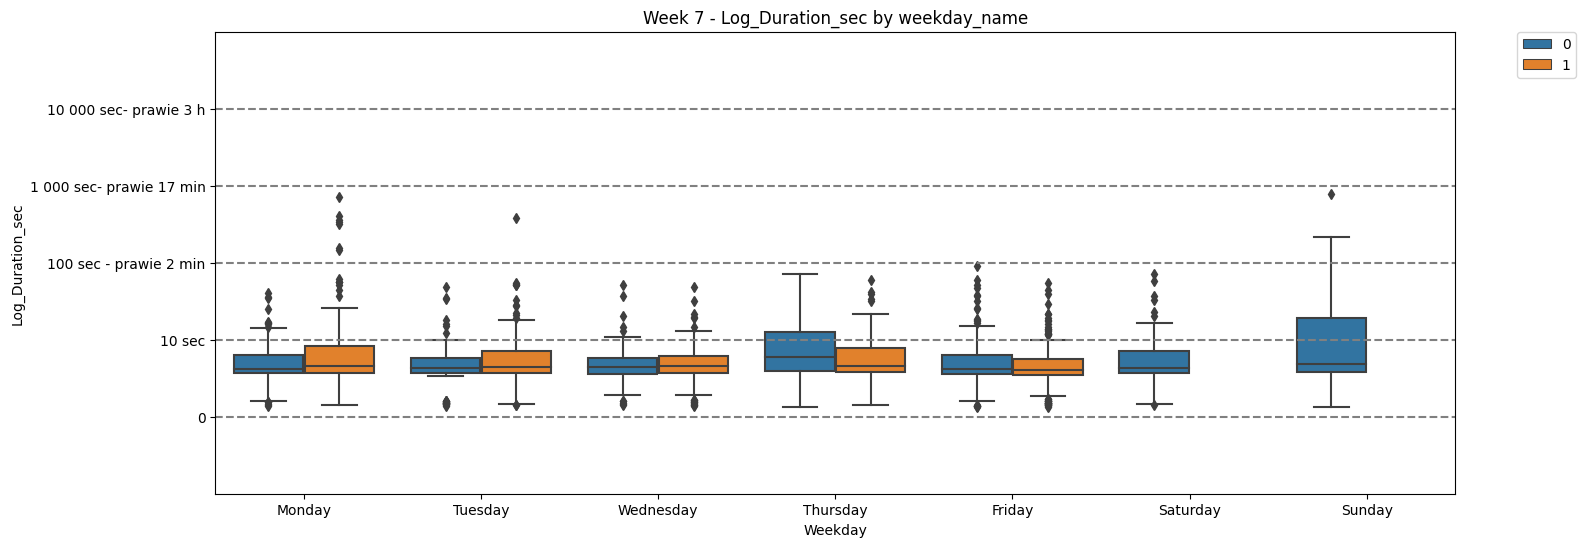

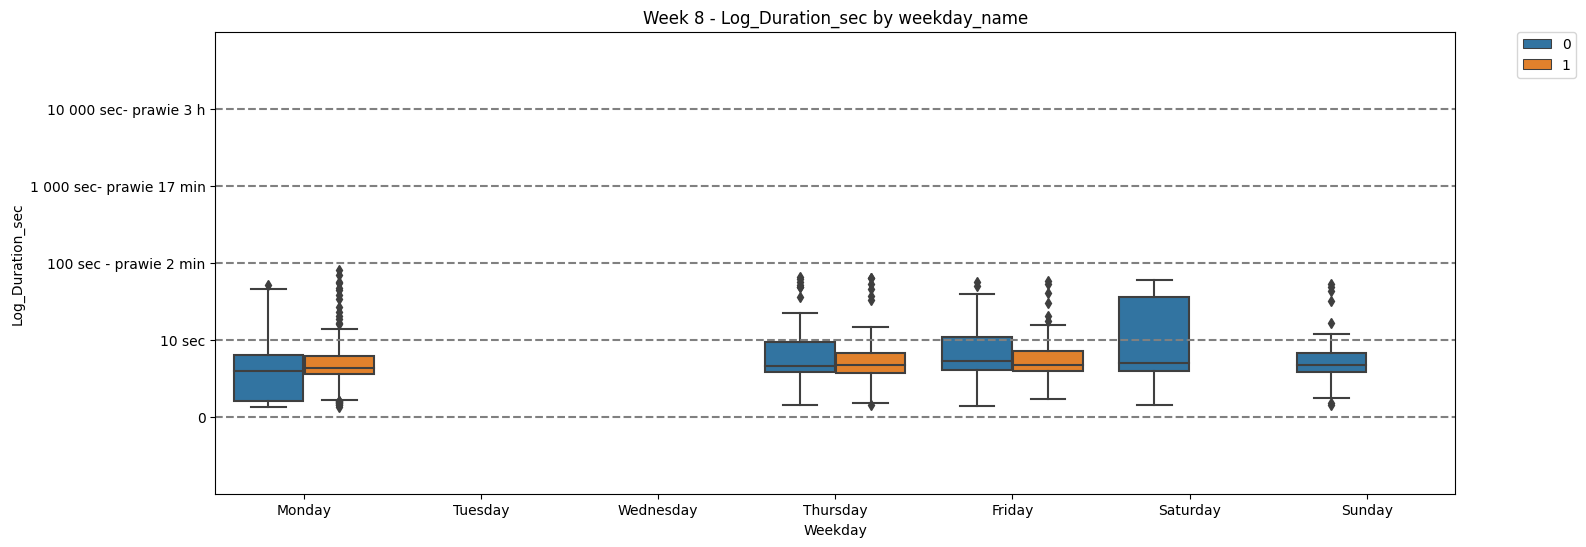

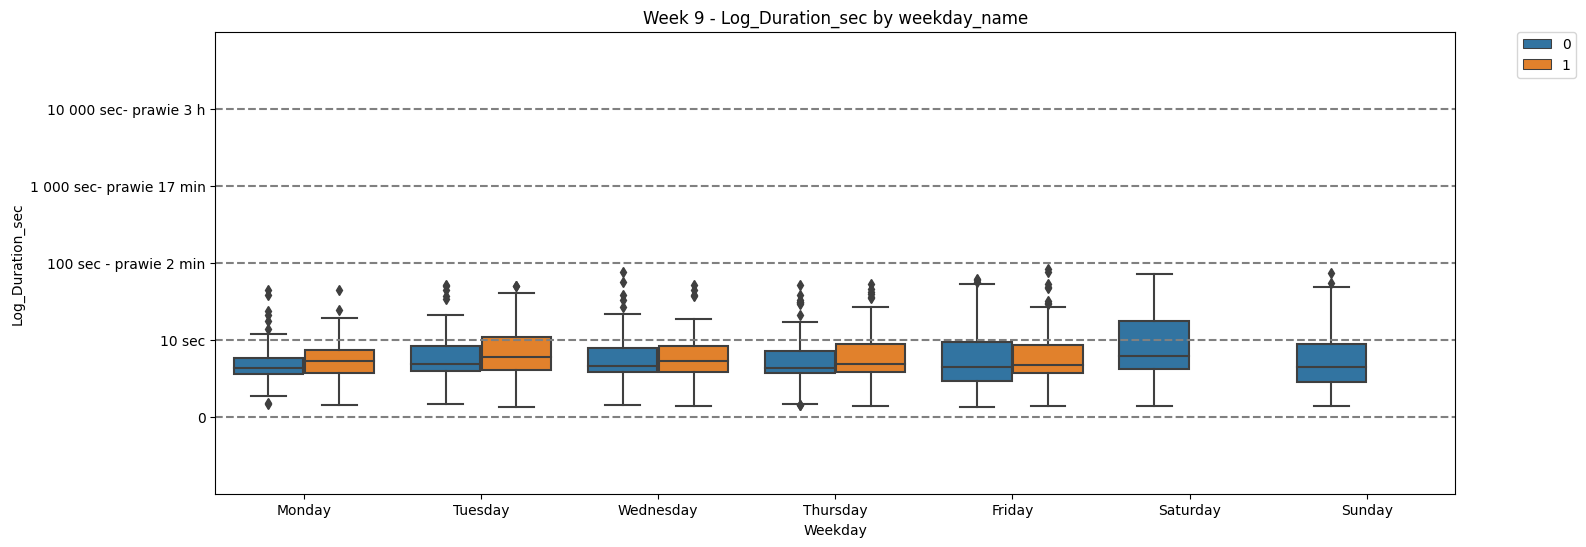

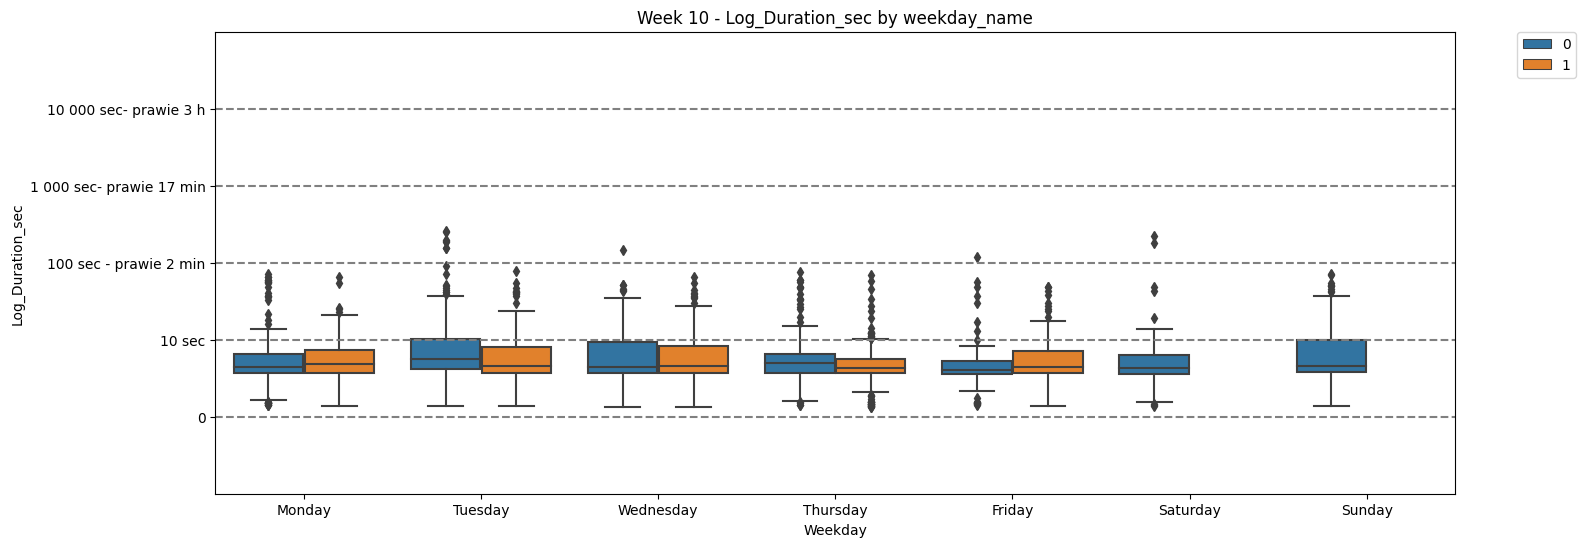

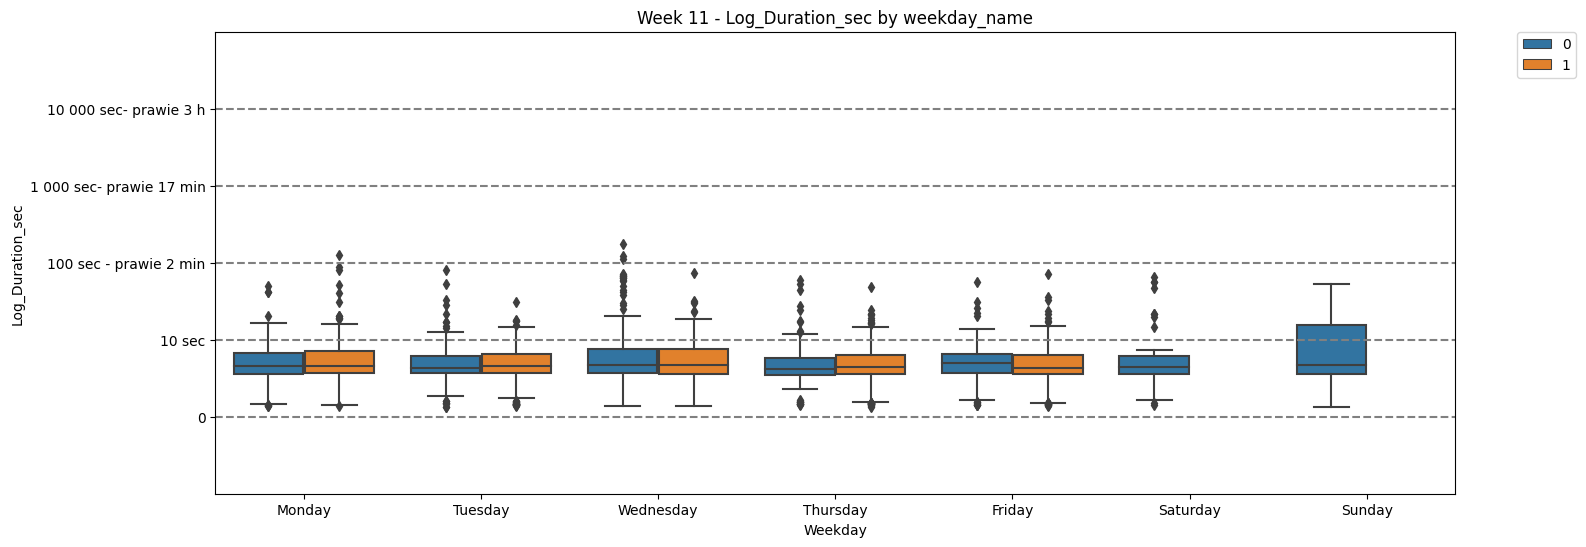

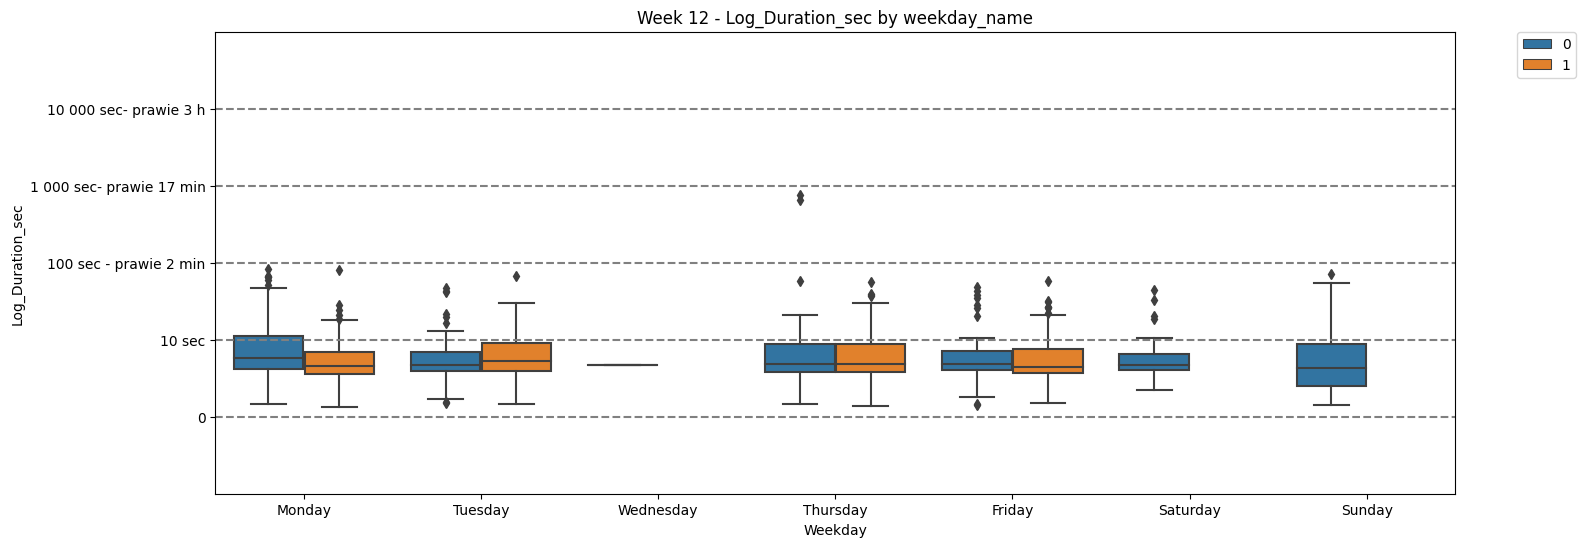

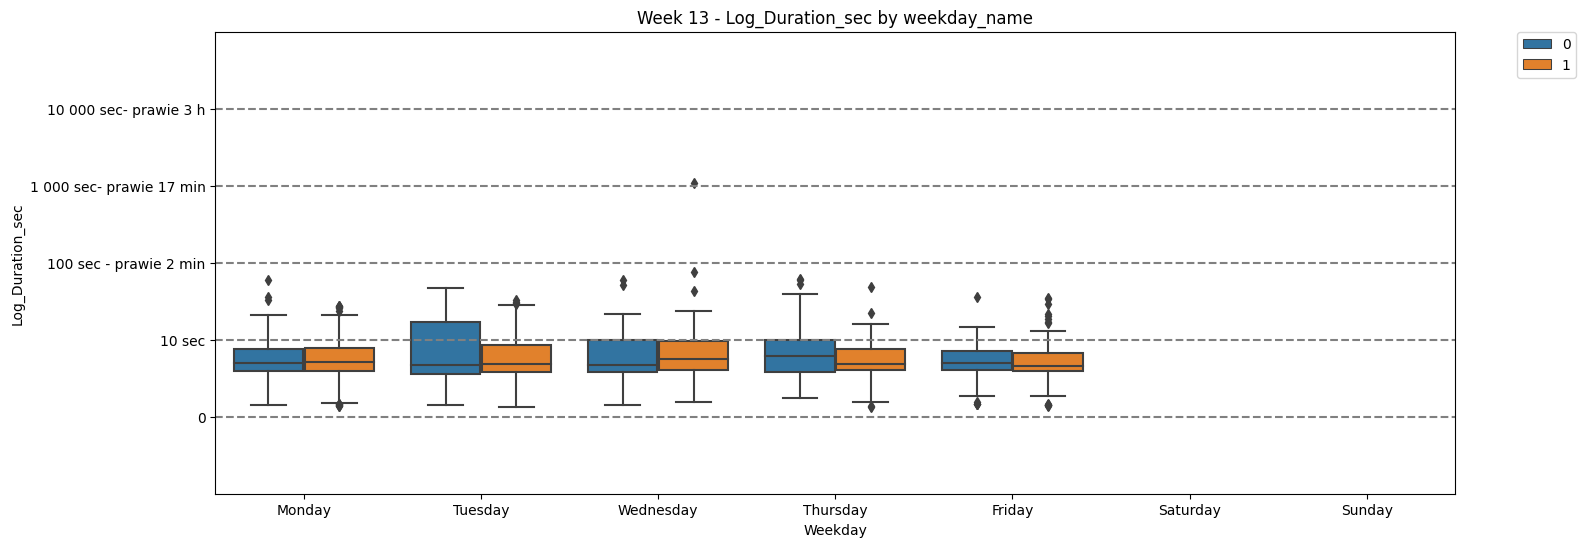

In [44]:
for i, v in enumerate(sorted(df_sample["week"].unique())):
    print(v)

    # Set the figure size
    plt.figure(figsize=(16, 6))

    # Check if dataframe is not empty before creating the boxplot
    if not df_sample[df_sample["week"] == v].empty:
        # Create a box plot with groupings based on Order Year
        g = sns.boxplot(data=df_sample[df_sample["week"] == v], x="weekday_name", y="Log_Duration_sec", order=WEEKDAY_ORDER, hue="working_hours")

        # Customize the plot
        g.set(ylim=(-1, 5), xlabel="Weekday", ylabel="Log_Duration_sec", title=f"Week {v} - Log_Duration_sec by weekday_name")
        g.set(yticks=[0, 1, 2, 3, 4], yticklabels=["0", "10 sec", "100 sec - prawie 2 min", "1 000 sec- prawie 17 min", "10 000 sec- prawie 3 h"])
        # Add horizontal lines at each ytick
        yticks = plt.yticks()[0]
        for ytick in yticks:
            plt.axhline(ytick, color='gray', linestyle='--')
        # Move the legend outside the chart box
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


6


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


7


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


8


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


9


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


10


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


11


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


12


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


13


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


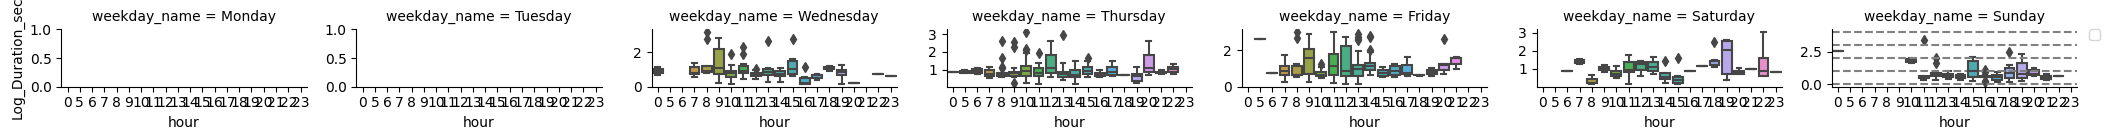

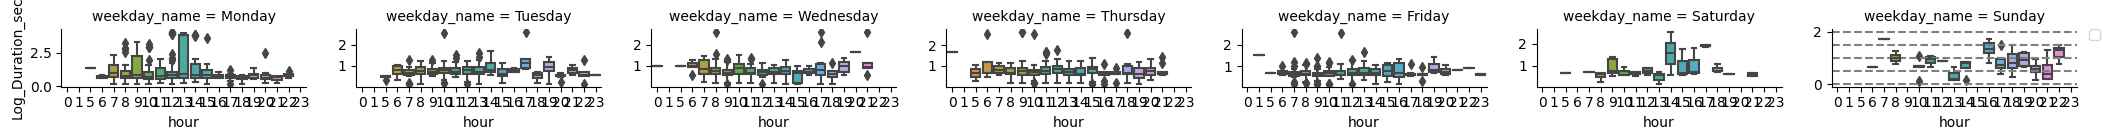

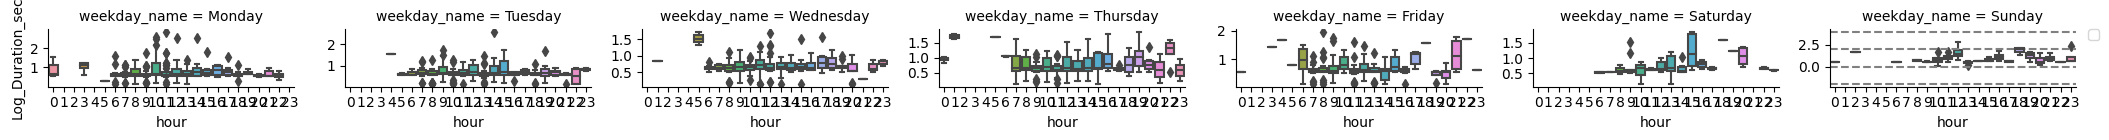

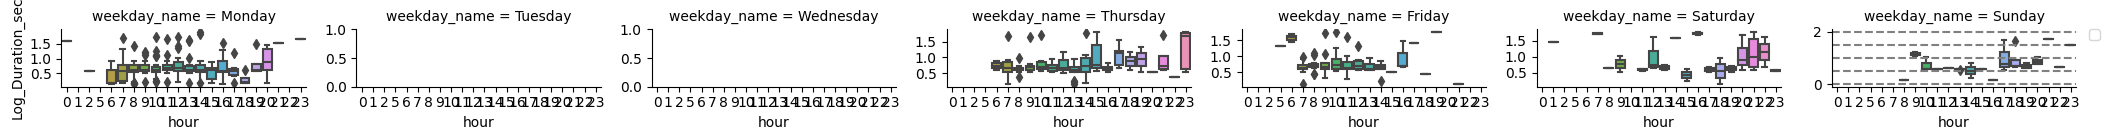

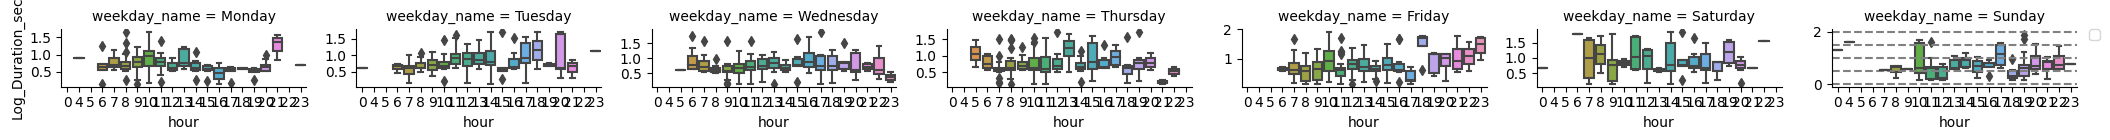

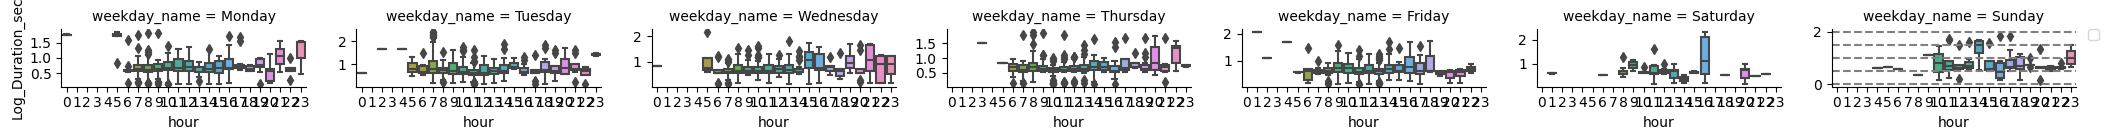

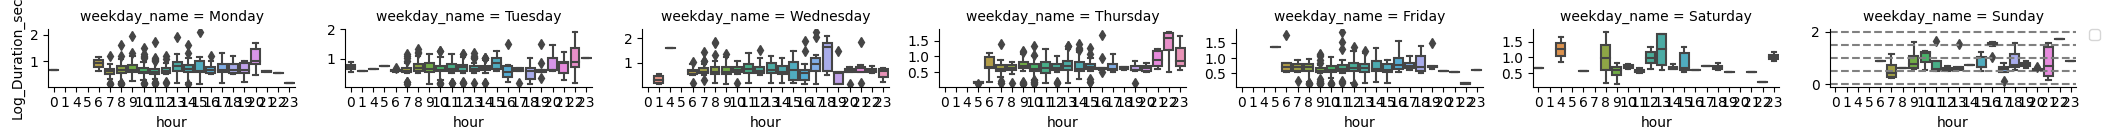

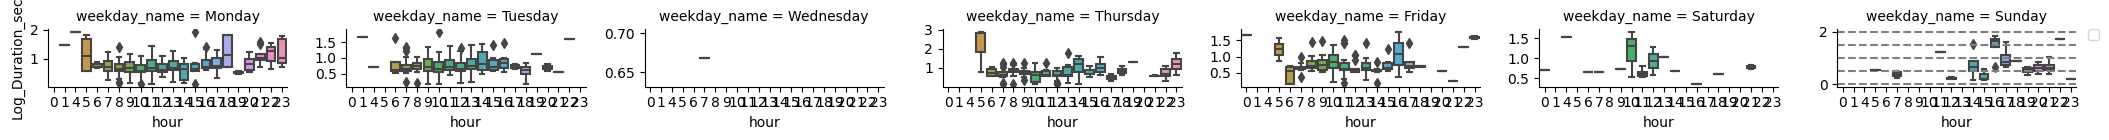

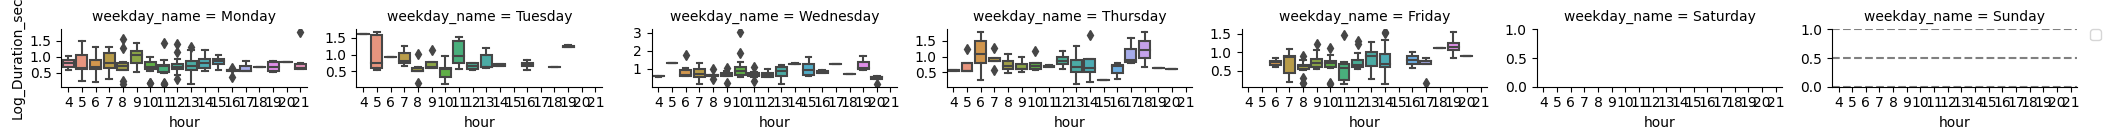

In [45]:
for i, v in enumerate(sorted(df_sample["week"].unique())):
    print(v)
    if not df_sample[df_sample["week"] == v].empty:
        g = sns.catplot(
            data=df_sample[df_sample["week"] == v],
            kind="box",
            x="hour",
#             order=WEEKDAY_ORDER,
            y="Log_Duration_sec",
#             hue="hour",
            col="weekday_name",
            col_order=WEEKDAY_ORDER,
            row_order=sorted(df_sample["hour"].unique()),
            aspect=2, height=1.5, sharey=False, legend_out=False,
        )
#         g.set(yticks=[0, 1, 2, 3, 4], yticklabels=["0", "10 sec", "100 sec - prawie 2 min", "1 000 sec- prawie 17 min", "10 000 sec- prawie 3 h"])
        # Add horizontal lines at each ytick
        yticks = plt.yticks()[0]
        for ytick in yticks:
            plt.axhline(ytick, color='gray', linestyle='--')
        # Move the legend outside the chart box
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


## SWARM PLOTS

In [46]:
# df_sample = df[~df['Queue'].isnull()].sample(frac=0.01, replace=False)
# df_sample

Text(0.5, 1.05, '[Duration in sec]')

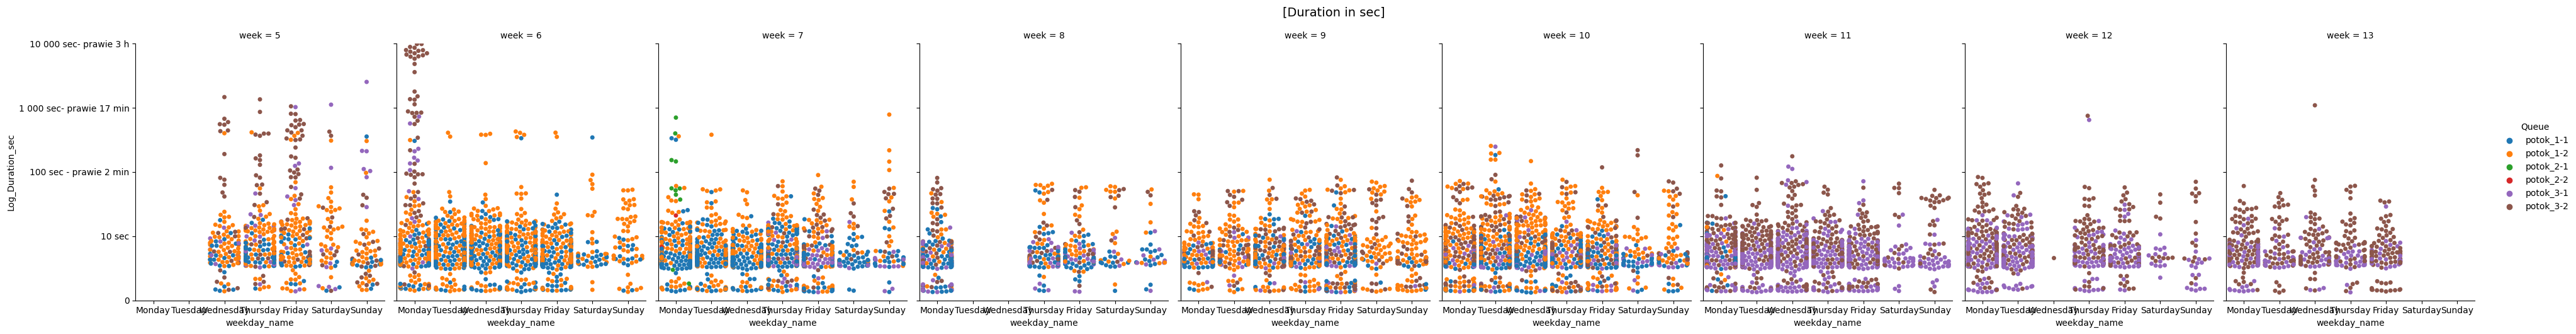

In [53]:
g = sns.catplot(
    data=df_sample[~df_sample['Queue'].isnull()], kind="swarm",
    x="weekday_name", order=WEEKDAY_ORDER, y="Log_Duration_sec", hue="Queue", hue_order=sorted(df_sample["Queue"].unique()), col="week", aspect=.85
)
g.set(ylim=(0, 3))
g.set(yticks=[0, 1, 2, 3, 4], yticklabels=["0", "10 sec", "100 sec - prawie 2 min", "1 000 sec- prawie 17 min", "10 000 sec- prawie 3 h"])
g.fig.suptitle(f"[Duration in sec]", fontsize=14, y=1.05)

Text(0.5, 1.05, '[Duration in sec]')

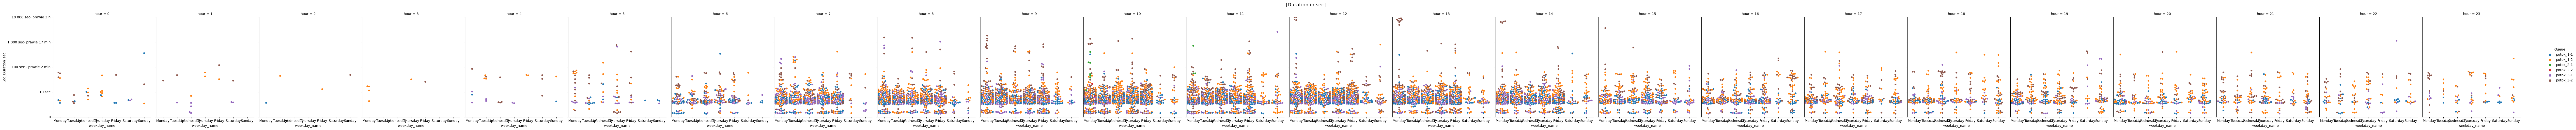

In [54]:
g = sns.catplot(
    data=df_sample[~df_sample['Queue'].isnull()], kind="swarm",
    x="weekday_name", order=WEEKDAY_ORDER, y="Log_Duration_sec", hue="Queue", hue_order=sorted(df_sample["Queue"].unique()), col="hour", aspect=.85
)
g.set(ylim=(0, 3))
g.set(yticks=[0, 1, 2, 3, 4], yticklabels=["0", "10 sec", "100 sec - prawie 2 min", "1 000 sec- prawie 17 min", "10 000 sec- prawie 3 h"])
g.fig.suptitle(f"[Duration in sec]", fontsize=14, y=1.05)

5
6
7
8
9
10
11
12
13


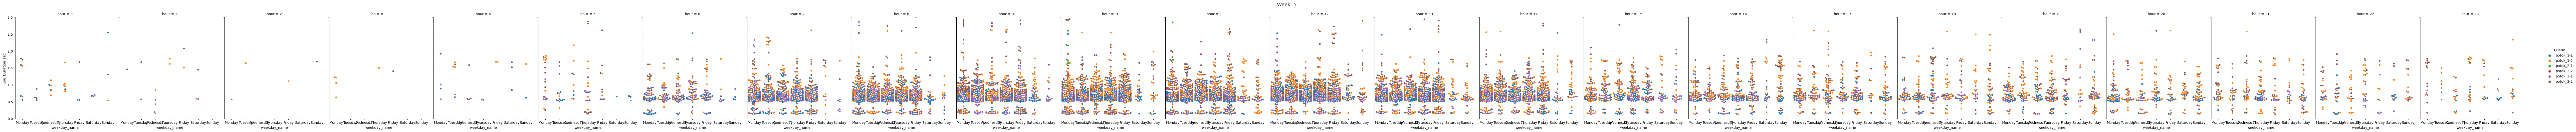

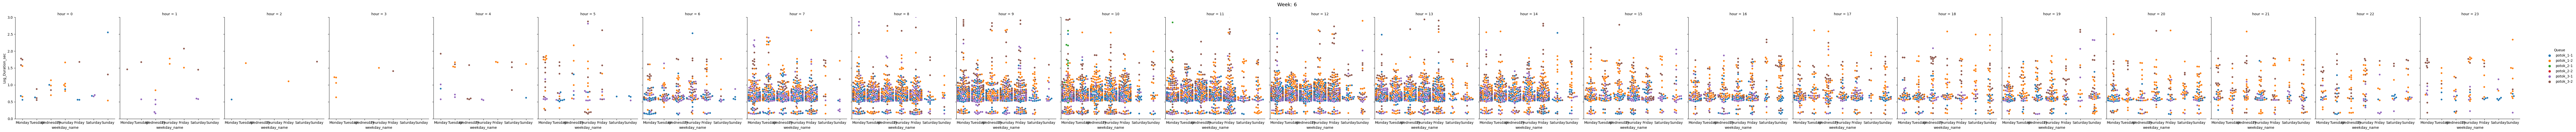

Error in callback <function flush_figures at 0x000002C63FEF3700> (for post_execute):



KeyboardInterrupt



In [49]:
for i, v in enumerate(sorted(df_sample["week"].unique())):
    print(v)
    g = sns.catplot(
        data=df_sample,
        kind="swarm",
#         x="hour",
#         order=sorted(df_sample["hour"].unique()),
        x="weekday_name",
        order=WEEKDAY_ORDER,
        y="Log_Duration_sec",
#         col="weekday_name",
#         col_order=sorted(df_sample["weekday_name"].unique()),
        col="hour",
        col_order=sorted(df_sample["hour"].unique()),
        hue="Queue",
        hue_order=sorted(df_sample["Queue"].unique()),
        aspect=.85
    )
    g.set(ylim=(0, 3))
    g.fig.suptitle(f"Week: {v}", fontsize=14, y=1.05)

In [50]:
df_sample

ID_Process      Queue  ID_Document  ProcessingDuration  Duration  \
337091     2228822  potok_3-1   2206462.00             3840.00   4358.00   
995140     2372978  potok_1-1   2358321.00              151.00    473.00   
32800      2879987  potok_3-2   2746125.00             2779.00   3255.00   
693952     2610607  potok_3-1   2449328.00              106.00    425.00   
373725     2858737  potok_3-2   2824216.00             4682.00   5655.00   
...            ...        ...          ...                 ...       ...   
573199     2491996  potok_3-2   2546809.00             3764.00  18940.00   
80642       100491  potok_1-1    217682.00             1994.00   2394.00   
512499     2461232  potok_3-1   2599598.00             2878.00   3170.00   
743382      376008  potok_1-2    368311.00             4314.00  15214.00   
984685      726375  potok_1-2    386648.00             2658.00  11261.00   

        InputPageCount  MessagesInQueue  Retries        StartDateTimeUtc  \
337091            1.00                0        0 2023-02-24 08:23:13.867   
995140            2.00                0        0 2023-03-06 08:00:07.450   
32800             1.00                0        0 2023-03-27 13:13:33.840   
693952            1.00                4        0 2023-03-11 20:39:11.450   
373725            1.00                5        0 2023-03-23 12:09:06.900   
...                ...              ...      ...                     ...   
573199            2.00                6        0 2023-03-10 10:29:56.957   
80642             1.00                2        0 2023-02-18 09:13:24.617   
512499            1.00               10        0 2023-03-16 14:27:45.740   
743382            1.00               24        0 2023-02-06 14:44:30.040   
984685            1.00                1        0 2023-02-04 13:11:21.387   

        ProcessingDuration_sec  ...  week  day  hour  minute  second  \
337091                    3.84  ...     8   24     8      23      13   
995140                    0.15  ...    10    6     8       0       7   
32800                     2.78  ...    13   27    13      13      33   
693952                    0.11  ...    10   11    20      39      11   
373725                    4.68  ...    12   23    12       9       6   
...                        ...  ...   ...  ...   ...     ...     ...   
573199                    3.76  ...    10   10    10      29      56   
80642                     1.99  ...     7   18     9      13      24   
512499                    2.88  ...    11   16    14      27      45   
743382                    4.31  ...     6    6    14      44      30   
984685                    2.66  ...     5    4    13      11      21   

       microsecond weekday  weekday_name  month_name  working_hours  
337091      867000       5        Friday    February              0  
995140      450000       1        Monday       March              0  
32800       840000       1        Monday       March              1  
693952      450000       6      Saturday       March              0  
373725      900000       4      Thursday       March              1  
...            ...     ...           ...         ...            ...  
573199      957000       5        Friday       March              1  
80642       617000       6      Saturday    February              0  
512499      740000       4      Thursday       March              1  
743382       40000       1        Monday    February              1  
984685      387000       6      Saturday    February              0  

[11078 rows x 29 columns]

## LINE PLOTS

## Months X Days


KeyboardInterrupt



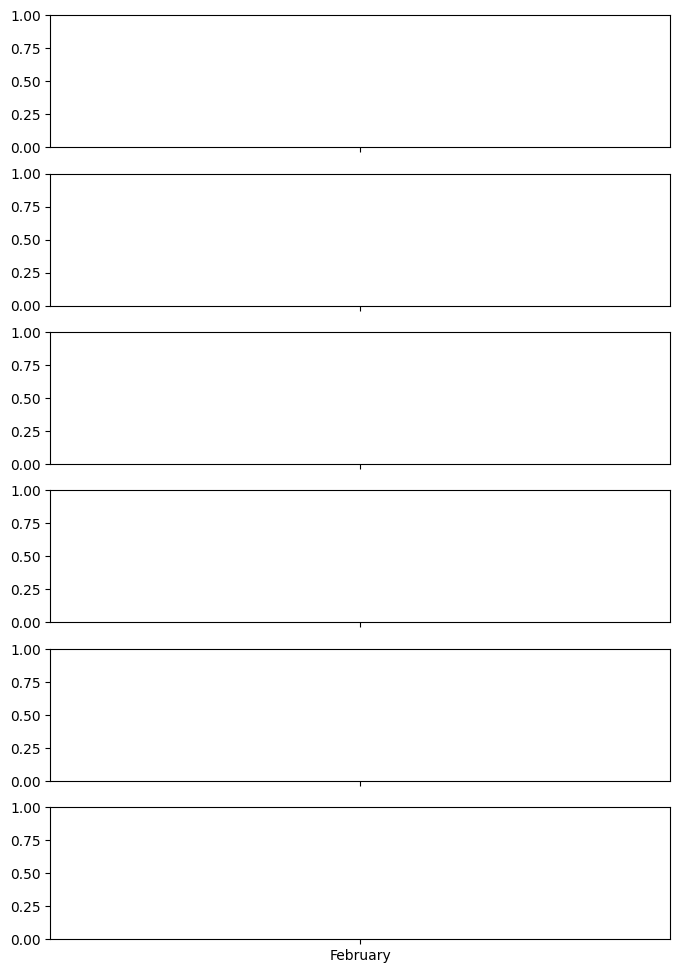

In [51]:
# Get the unique values in the "Queue" column
queues = df_sample["Queue"].unique()

# Create a subplot grid to accommodate all the line plots
fig, axs = plt.subplots(nrows=len(queues), ncols=1, figsize=(8, 12), sharex=True)

# Iterate over the queues and create a line plot for each queue
for i, queue in enumerate(queues):
    # Filter the data to include only the current queue
    queue_data = df_sample[df_sample["Queue"] == queue]
    
    grouped_data = queue_data.groupby(['Queue', 'month_name', 'weekday_name']).agg(
    quantity=('Log_Duration_sec', 'count'),
    Mean_Log_Duration_sec=('Log_Duration_sec', 'mean'),
    Sum_Log_Duration_sec=('Log_Duration_sec', 'sum')
    ).reset_index()

    # Pivot the data to create a table with months as rows and years as columns
#     pivot_data = pd.pivot_table(queue_data, values="Sum_Log_Duration_sec", index="month_name", columns="year", aggfunc=np.sum)
    agg_data_pivot = pd.pivot_table(
        grouped_data,
        values='quantity',
        index=['month_name'],
        columns=['weekday_name'],
        aggfunc=sum,
        fill_value=0
    )

    # Plot the data as a line plot
    ax = sns.lineplot(data=agg_data_pivot, ax=axs[i])

    # Set the title and y-axis ticks for the current subplot
    ax.set_title(f"Sum of Quantity by Month for Queue: {queue}")
    ax.set_yticks(list(range(0, 100, 100)))
    for y in range(0, 100, 100):
        ax.axhline(y=y, linestyle='-', color='gray', alpha=0.2)

    # Display legend only for the first plot
    if i == 0:
        ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
    else:
        ax.legend().set_visible(False)

    # Increase the spacing between subplots
    plt.subplots_adjust(hspace=0.5)

# Add a main title for the entire figure
fig.suptitle("Sum of Quantity by Month for all Queues and Years")

# Show the plot
plt.show()


## Months X Hours

In [ ]:
# Get the unique values in the "Queue" column
queues = df_sample["Queue"].unique()

# Create a subplot grid to accommodate all the line plots
fig, axs = plt.subplots(nrows=len(queues), ncols=1, figsize=(8, 12), sharex=True)

# Iterate over the queues and create a line plot for each queue
for i, queue in enumerate(queues):
    # Filter the data to include only the current queue
    queue_data = df_sample[df_sample["Queue"] == queue]
    
    grouped_data = queue_data.groupby(['Queue', 'month_name', 'hour']).agg(
    quantity=('Log_Duration_sec', 'count'),
    Mean_Log_Duration_sec=('Log_Duration_sec', 'mean'),
    Sum_Log_Duration_sec=('Log_Duration_sec', 'sum')
    ).reset_index()

    # Pivot the data to create a table with months as rows and years as columns
#     pivot_data = pd.pivot_table(queue_data, values="Sum_Log_Duration_sec", index="month_name", columns="year", aggfunc=np.sum)
    agg_data_pivot = pd.pivot_table(
        grouped_data,
        values='quantity',
        index=['month_name'],
        columns=['hour'],
        aggfunc=sum,
        fill_value=0
    )

    # Plot the data as a line plot
    ax = sns.lineplot(data=agg_data_pivot, ax=axs[i])

    # Set the title and y-axis ticks for the current subplot
    ax.set_title(f"Sum of Quantity by Month for Queue: {queue}")
    ax.set_yticks(list(range(0, 100, 100)))
    for y in range(0, 100, 100):
        ax.axhline(y=y, linestyle='-', color='gray', alpha=0.2)

    # Display legend only for the first plot
    if i == 0:
        ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
    else:
        ax.legend().set_visible(False)

    # Increase the spacing between subplots
    plt.subplots_adjust(hspace=0.5)

# Add a main title for the entire figure
fig.suptitle("Sum of Quantity by Hour for all Queues and Months")

# Show the plot
plt.show()


## Days X Hours

In [ ]:
# Define the desired order of weekdays
weekday_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday"
]

# Get the unique values in the "Queue" column
queues = df_sample["Queue"].unique()

# Create a subplot grid to accommodate all the line plots
fig, axs = plt.subplots(nrows=len(queues), ncols=1, figsize=(8, 12), sharex=True)

# Iterate over the queues and create a line plot for each queue
for i, queue in enumerate(queues):
    # Filter the data to include only the current queue
    queue_data = df_sample[df_sample["Queue"] == queue]

    # Convert "weekday_name" to categorical variable with the desired order
    weekday_cat = pd.Categorical(
        queue_data["weekday_name"],
        categories=weekday_order,
        ordered=True
    )

    # Group the data by "Queue", "weekday_name", and "hour", with the desired weekday order
    grouped_data = queue_data.groupby(['Queue', weekday_cat, 'hour']).agg(
        quantity=('Log_Duration_sec', 'count'),
        Mean_Log_Duration_sec=('Log_Duration_sec', 'mean'),
        Sum_Log_Duration_sec=('Log_Duration_sec', 'sum')
    ).reset_index()
    
    # Sort the data by weekday_name using the weekday_order
#     grouped_data = grouped_data.reindex(weekday_order, level=1)
    
    # Pivot the data to create a table with months as rows and years as columns
    agg_data_pivot = pd.pivot_table(
        grouped_data,
        values='quantity',
        index=['level_1'],
        columns=['hour'],
        aggfunc=sum,
        fill_value=0
    )

    # Plot the data as a line plot
    ax = sns.lineplot(data=agg_data_pivot, ax=axs[i])

    # Set the title and y-axis ticks for the current subplot
    ax.set_title(f"Sum of Quantity by Month for Queue: {queue}")
    ax.set_yticks(list(range(0, 100, 100)))
    for y in range(0, 100, 100):
        ax.axhline(y=y, linestyle='-', color='gray', alpha=0.2)

    # Display legend only for the first plot
    if i == 0:
        ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
    else:
        ax.legend().set_visible(False)

    # Increase the spacing between subplots
    plt.subplots_adjust(hspace=0.5)

# Add a main title for the entire figure
fig.suptitle("Sum of Quantity by Hour for all Queues and Weekdays")

# Show the plot
plt.show()
